In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import statsmodels.formula.api as sm
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [86]:
# google drive import
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
# 그래프에서 한글 표시가 가능하도록 하는 코드

!apt install -y fonts-nanum
!fc-cache -fv

applyfont = "NanumBarunGothic"

import matplotlib.font_manager as fm
if not any(map(lambda ft: ft.name == applyfont, fm.fontManager.ttflist)):
  fm.fontManager.addfont("/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf") # 한글 표시가 안 되면 이 경로를 복사해서 font_path로 지정하기

plt.rc("font", family=applyfont)
plt.rc("axes", unicode_minus=False)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

# 1. 초본

In [116]:
# 데이터프레임 생성
herb = pd.read_csv('/content/drive/MyDrive/forest_measurement/biomass_herb.csv') # change to your own file path

In [89]:
# 데이터프레임 정보 확인
herb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   조            93 non-null     int64  
 1   조사구 번호       93 non-null     int64  
 2   식생번호         93 non-null     int64  
 3   종류(초본, 양치류)  93 non-null     object 
 4   줄기길이(cm)     93 non-null     float64
 5   줄기수(개)       93 non-null     int64  
 6   높이(cm)       93 non-null     float64
 7   지상부 건중량(g)   93 non-null     float64
 8   지하부 건중량(g)   93 non-null     float64
 9   전체 건중량(g)    93 non-null     float64
dtypes: float64(5), int64(4), object(1)
memory usage: 7.4+ KB


In [90]:
# 데이터프레임 기본 통계량
herb.describe()

,조,조사구 번호,식생번호,줄기길이(cm),줄기수(개),높이(cm),지상부 건중량(g),지하부 건중량(g),전체 건중량(g)
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,2.709677,1.516129,10.344086,23.353763,2.387097,13.179570,0.461505,1.365161,1.826667
std,1.089282,0.701131,8.127375,14.907917,3.036131,9.662754,1.035567,4.579806,5.534438
min,1.000000,1.000000,1.000000,0.300000,1.000000,0.100000,0.010000,0.010000,0.020000
25%,2.000000,1.000000,4.000000,11.000000,1.000000,5.000000,0.050000,0.030000,0.080000
50%,3.000000,1.000000,8.000000,21.000000,1.000000,11.500000,0.090000,0.060000,0.150000
75%,3.000000,2.000000,16.000000,35.000000,2.000000,18.000000,0.380000,0.170000,0.570000
max,5.000000,4.000000,31.000000,57.600000,21.000000,44.300000,5.870000,31.960000,37.830000


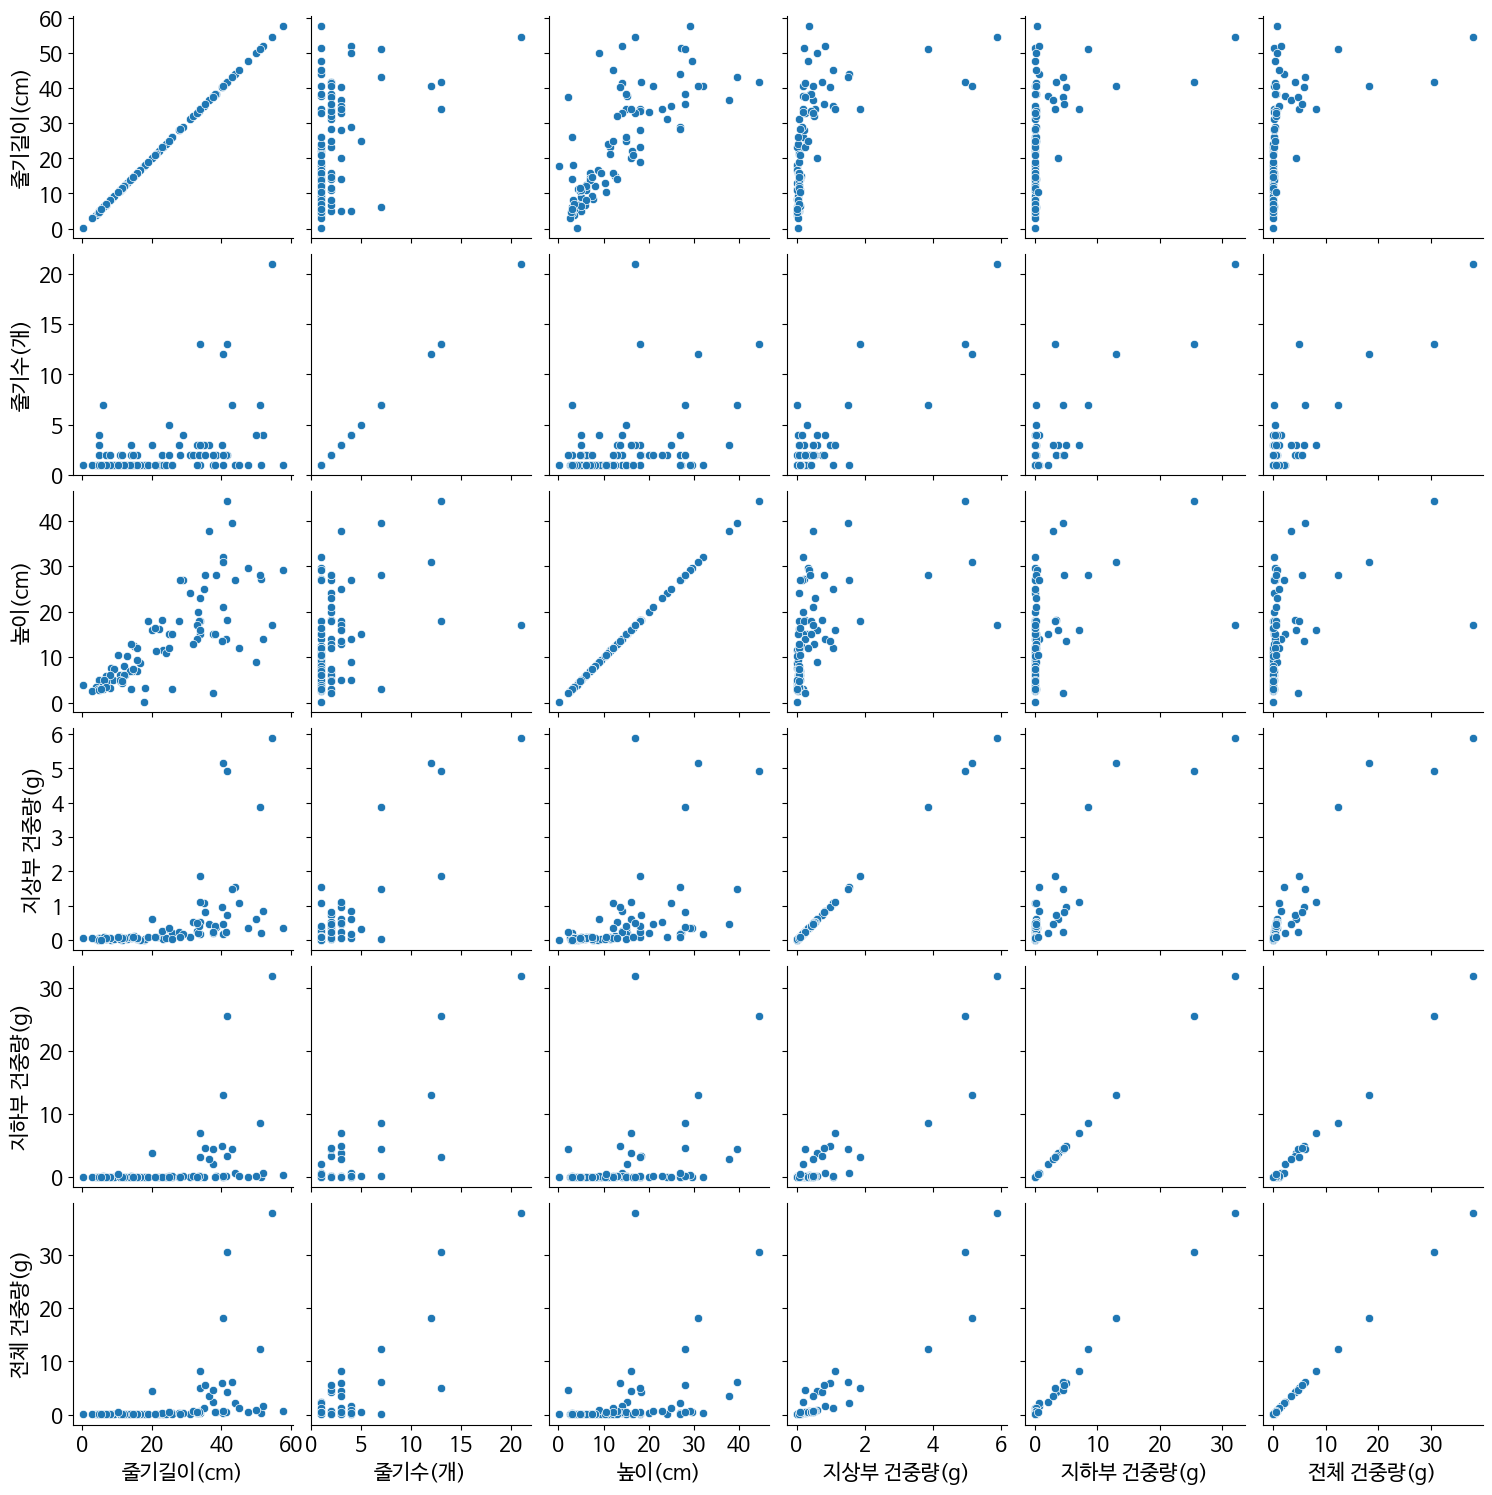

In [91]:
# Create a pair plot
g = sns.pairplot(data=herb.loc[:, '줄기길이(cm)':'전체 건중량(g)'],
             kind='scatter',
             diag_kind=None,
             corner=False)

# Change font size of axes labels
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=15)
    ax.set_ylabel(ax.get_ylabel(), fontsize=15)

# Change font size of tick labels
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_fontsize(15)
    for label in ax.get_yticklabels():
        label.set_fontsize(15)

plt.savefig('/content/drive/MyDrive/forest_measurement/herb_pair_plot_all.png', dpi = 600, bbox_inches = 'tight') # change to your own file path
plt.show()

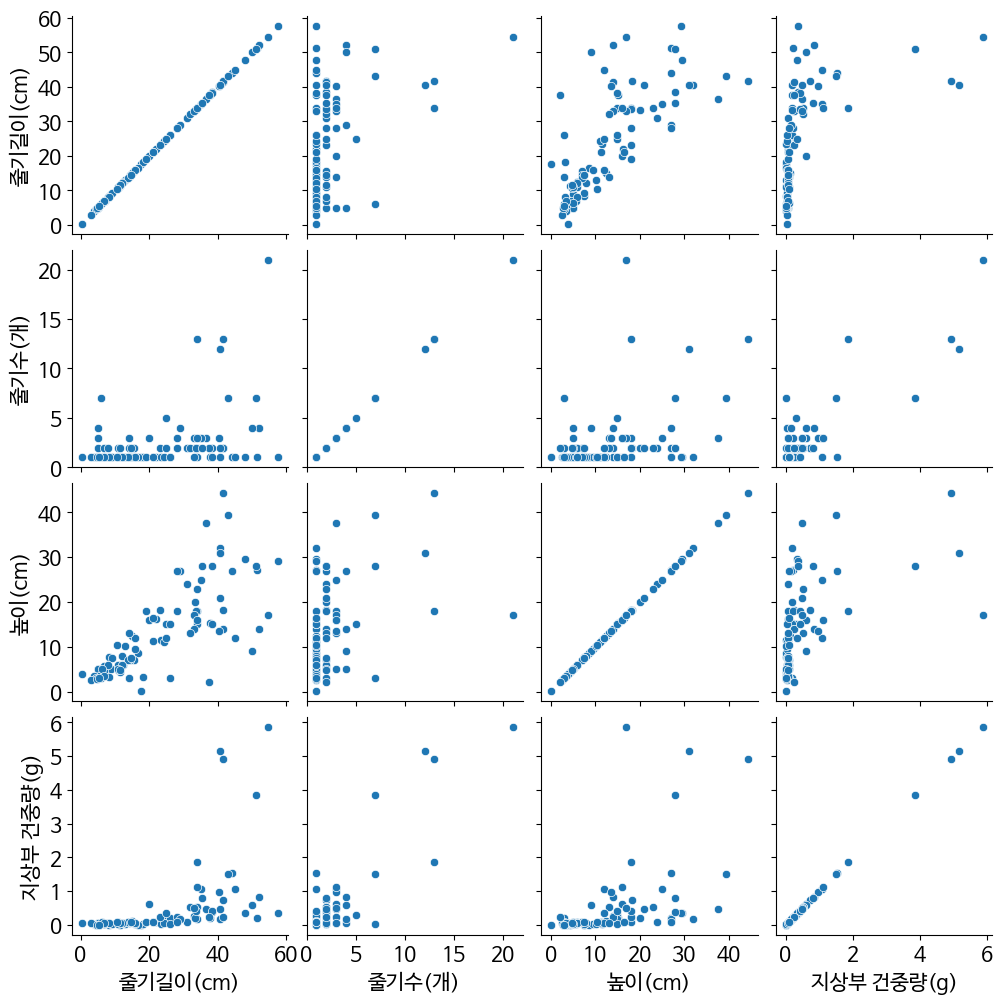

In [92]:
# Create a pair plot
g = sns.pairplot(data=herb.loc[:, '줄기길이(cm)':'지상부 건중량(g)'],
             kind='scatter',
             diag_kind=None,
             corner=False)

# Change font size of axes labels
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=15)
    ax.set_ylabel(ax.get_ylabel(), fontsize=15)

# Change font size of tick labels
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_fontsize(15)
    for label in ax.get_yticklabels():
        label.set_fontsize(15)

plt.savefig('/content/drive/MyDrive/forest_measurement/herb_pair_plot_above.png', dpi = 600, bbox_inches = 'tight') # change to your own file path
plt.show()

# 1.1. 지상부 건중량 선형회귀 (독립변수: 줄기길이(cm), 줄기수(개), 높이(cm), 종속변수: 지상부 건중량(g))

In [93]:
# 머신러닝 학습용 데이터 준비하기
data = herb[['줄기길이(cm)', '줄기수(개)', '높이(cm)']].to_numpy()
target = herb['지상부 건중량(g)'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2, random_state = 42)

In [94]:
# 학습용 데이터를 데이터프레임으로 변환
train_herb = pd.DataFrame(data = train_input, columns = ['줄기길이(cm)', '줄기수(개)', '높이(cm)'])
train_herb['지상부 건중량(g)'] = train_target
print(train_herb)
test_herb = pd.DataFrame(data = test_input, columns = ['줄기길이(cm)', '줄기수(개)', '높이(cm)'])
test_herb['지상부 건중량(g)'] = test_target
print(test_herb)

    줄기길이(cm)  줄기수(개)  높이(cm)  지상부 건중량(g)
0       12.3     1.0     6.0        0.06
1       37.7     1.0    15.2        0.20
2       32.0     2.0    13.0        0.52
3       21.0     1.0    16.5        0.09
4       11.3     1.0     6.0        0.05
..       ...     ...     ...         ...
69       5.0     2.0     5.0        0.04
70      14.0     3.0    13.0        0.07
71      45.0     1.0    12.0        1.08
72      15.9     1.0     9.4        0.03
73       6.8     1.0     4.5        0.04

[74 rows x 4 columns]
    줄기길이(cm)  줄기수(개)  높이(cm)  지상부 건중량(g)
0       10.8     1.0     4.8        0.05
1        6.0     7.0     3.0        0.02
2       41.5     2.0    14.0        0.24
3       12.0     1.0     6.0        0.06
4       47.8     1.0    29.6        0.35
5       26.0     1.0     3.0        0.20
6       14.9     1.0    12.5        0.12
7        6.9     1.0     3.5        0.06
8       20.0     3.0    16.0        0.61
9        9.3     1.0     7.5        0.03
10      11.5     2.0     4.7      

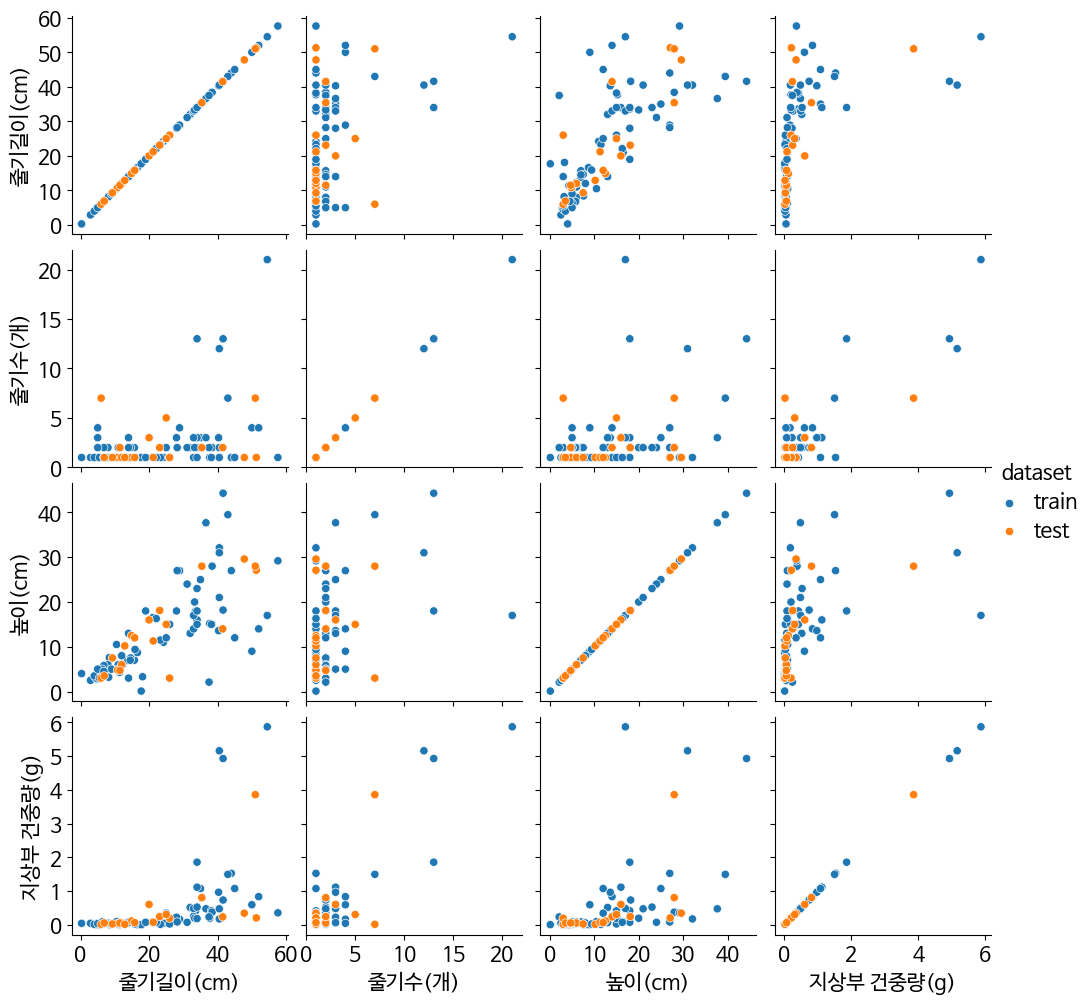

In [95]:
# 학습용 데이터와 테스트용 데이터를 그래프에 표시

# Concatenate the DataFrames
combined_herb = pd.concat([train_herb.assign(dataset='train'),
                           test_herb.assign(dataset='test')])

g = sns.pairplot(data=combined_herb, hue='dataset',
             kind='scatter', diag_kind=None, corner=False)

# Change font size of axes labels
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=15)
    ax.set_ylabel(ax.get_ylabel(), fontsize=15)

# Change font size of tick labels
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_fontsize(15)
    for label in ax.get_yticklabels():
        label.set_fontsize(15)

legend = g._legend  # Access the legend object
title = legend.get_title()
title.set_fontsize(15)  # Set desired font size
for text in legend.texts:
    text.set_fontsize(15)  # Set desired font size

plt.savefig('/content/drive/MyDrive/forest_measurement/herb_pair_plot_train_test.png', dpi = 600, bbox_inches = 'tight') # change to your own file path
plt.show()

# 1.1.1. 머신러닝 기법 사용

In [97]:
# 단순 선형회귀
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))
print(lr.coef_, lr.intercept_)

0.8402116644470097
0.5209559996616115
[0.00812306 0.27115167 0.00929126] -0.4951732773832553


In [98]:
# randomforestregressor 사용
rf = RandomForestRegressor(n_jobs = -1,
                           n_estimators = 1000,
                           criterion = 'squared_error',
                           oob_score = True)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.7082248746816582


In [99]:
# 다중회귀 사용
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
print(poly.get_feature_names_out())
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2']
0.9305351454177793
0.7826203280247959


In [100]:
# 데이터 정규화
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [101]:
# 릿지 회귀 사용
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9231982193772189
0.7580702049296029


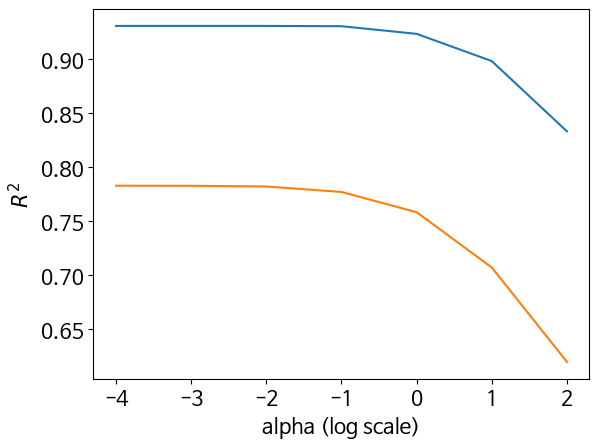

In [102]:
# 릿지 회귀에서의 규제값 조절
train_score = []
test_score = []
alpha_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
for i in alpha_list :
    ridge = Ridge(alpha = i)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha (log scale)', fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel(r'$R^{2}$', fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [103]:
# 릿지 회귀 사용 (alpha = 0.0001)
ridge = Ridge(alpha = 0.0001)
ridge.fit(train_scaled, train_target)
print(ridge.coef_, ridge.intercept_)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

[-0.04636944 -0.55330619 -0.02067334 -0.01406003  0.29818465  0.70171014
  0.29615699  1.14487345 -0.82813128] 0.47986486486486507
0.9305351450589985
0.782612952948198


In [104]:
# 라쏘 회귀 사용
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.0
-0.011364612914692485


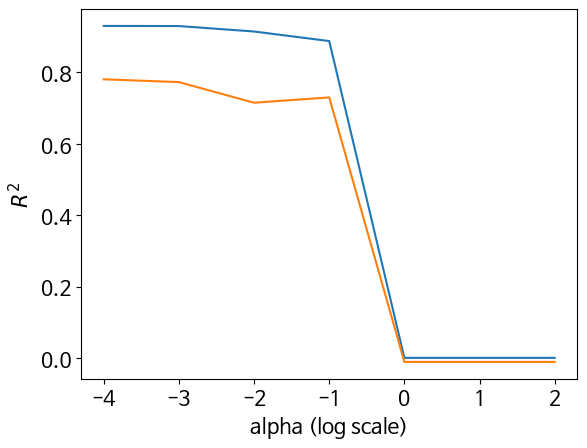

In [105]:
# 라쏘 회귀에서의 규제값 조절
train_score = []
test_score = []
alpha_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
for i in alpha_list :
    lasso = Lasso(alpha = i, max_iter = 10000)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha (log scale)', fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel(r'$R^{2}$', fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [106]:
# 라쏘 회귀 사용
lasso = Lasso(alpha = 0.0001)
lasso.fit(train_scaled, train_target)
print(lasso.coef_, lasso.intercept_)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

[-4.88786118e-02 -5.45501032e-01 -1.33657235e-02 -2.74522529e-04
  2.82186314e-01  6.77507976e-01  3.04140692e-01  1.14262477e+00
 -8.16038855e-01] 0.479864864864865
0.9305287285519067
0.7809492983262669


데이터가 적어서 어떤 모델을 쓰든 차이가 크지 않다!
이차함수로 회귀시키자...

In [107]:
# 다중회귀 사용
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
print(poly.get_feature_names_out())
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.coef_)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2']
[-3.11783355e-03 -1.70852998e-01 -2.11030668e-03 -1.78492740e-05
  1.85209556e-03  1.55138756e-03  5.02812649e-03  1.22284740e-02
 -2.18126931e-03]
0.9305351454177793
0.7826203280247959


# 1.1.2. 통계 모델 사용

# 1.1.2.1. statsmodel 사용

In [112]:
new_herb = herb.rename(columns={
    '지상부 건중량(g)': '지상부_건중량',
    '줄기길이(cm)': '줄기길이',
    '줄기수(개)': '줄기수',
    '높이(cm)': '높이'
})

In [113]:
# 선형함수 회귀
linear = sm.ols(formula = '지상부_건중량 ~ 줄기길이 + 줄기수 + 높이', data = new_herb).fit()
linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                지상부_건중량   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     117.8
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           6.99e-31
Time:                        10:38:14   Log-Likelihood:                -60.149
No. Observations:                  93   AIC:                             128.3
Df Residuals:                      89   BIC:                             138.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5583      0.093     -6.017      0.000      -0.743      -0.374
줄기길이           0.0106      0.005      2.084      0.040       0.000       0.021
줄기수            0.2624      0.018     14.800      0.000       0.227       0.298
높이             0.0111      0.008      1.432      0.156      -0.004       0.027
==============================================================================
Omnibus:                       23.202   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.378
Skew:                           0.568   Prob(JB):                     3.56e-23
Kurtosis:                       8.039   Cond. No.                         60.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
# 로그함수로 회귀
exponential = sm.ols(formula = 'np.log(지상부_건중량) ~ 줄기길이 + 줄기수 + 높이', data = new_herb).fit()
exponential.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(지상부_건중량)   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     93.52
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           2.03e-27
Time:                        10:38:19   Log-Likelihood:                -106.96
No. Observations:                  93   AIC:                             221.9
Df Residuals:                      89   BIC:                             232.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.2003      0.154    -27.363      0.000      -4.505      -3.895
줄기길이           0.0603      0.008      7.196      0.000       0.044       0.077
줄기수            0.1571      0.029      5.356      0.000       0.099       0.215
높이             0.0264      0.013      2.047      0.044       0.001       0.052
==============================================================================
Omnibus:                        4.967   Durbin-Watson:                   1.213
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                4.196
Skew:                          -0.424   Prob(JB):                        0.123
Kurtosis:                       2.396   Cond. No.                         60.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 1.1.2.2. scipy 사용

Fitted Parameters: a=0.010551585817634383, b=0.2624336871623149, c=0.01114849762840726, d=-0.5583008745214291
y = 0.010551585817634383x_1 + 0.2624336871623149x_2 + 0.01114849762840726x_3 + -0.5583008745214291
R-squared: 0.7987978218541247
Mean Absolute Error: 0.2929261766293447
Root Mean Squared Error: 0.46200551239729476


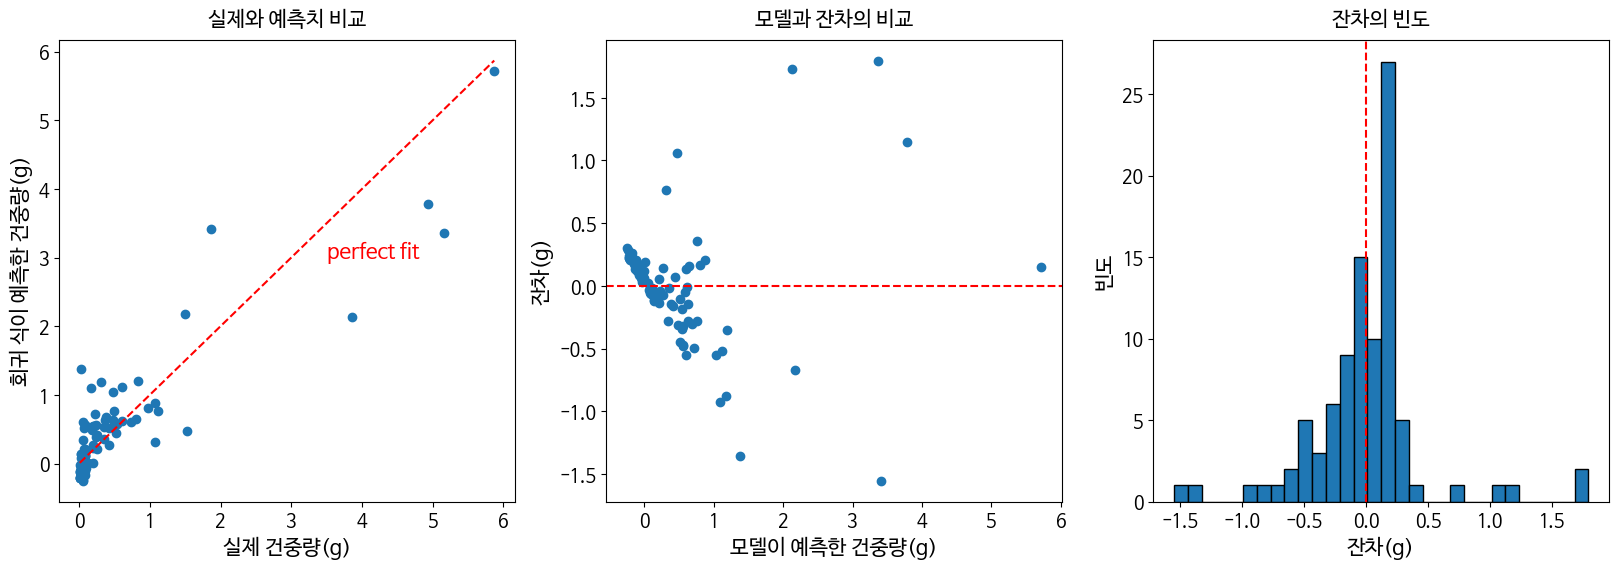

In [138]:
# 선형함수 회귀

# Define the model function
def model(X, a, b, c, d) :
    x_1, x_2, x_3 = X
    return a * x_1 + b * x_2 + c * x_3 + d

x_1 = herb['줄기길이(cm)'].to_numpy()
x_2 = herb['줄기수(개)'].to_numpy()
x_3 = herb['높이(cm)'].to_numpy()
y = herb['지상부 건중량(g)'].to_numpy()

# Flatten variables for curve_fit
x_1 = x_1.flatten()
x_2 = x_2.flatten()
x_3 = x_3.flatten()
y = y.flatten()

# Fit the model
initial_guess = [0.1, 0.1, 0.1, 0.1]  # Initial guesses for a, b, c, d
params, covariance = curve_fit(model, (x_1, x_2, x_3), y, p0 = initial_guess)

# Extract fitted parameters
a, b, c, d = params
print(f"Fitted Parameters: a={a}, b={b}, c={c}, d={d}")
print(f'y = {a}x_1 + {b}x_2 + {c}x_3 + {d}')

# Predict using the fitted model
y_pred = model((x_1, x_2, x_3), a, b, c, d)

# Compute residuals
residuals = y - y_pred

# Metrics for goodness-of-fit
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

# Visualization
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 6))

# 1. Actual vs Predicted
ax[0].scatter(y, y_pred)
ax[0].plot([min(y), max(y)], [min(y), max(y)], linestyle = '--', color = 'red')
ax[0].text(x = 3.5, y = 3, s = 'perfect fit', color = 'red', fontsize = 15)
ax[0].set_xlabel("실제 건중량(g)", fontsize = 15)
ax[0].set_ylabel("회귀 식이 예측한 건중량(g)", fontsize = 15)
ax[0].set_title("실제와 예측치 비교", fontsize = 15, pad = 10)

# 2. Residuals
ax[1].scatter(y_pred, residuals)
ax[1].axhline(0, color='red', linestyle='--')
ax[1].set_xlabel('모델이 예측한 건중량(g)', fontsize = 15)
ax[1].set_ylabel('잔차(g)', fontsize = 15)
ax[1].set_title('모델과 잔차의 비교', fontsize = 15, pad = 10)

# 3. Distribution of Residuals
ax[2].hist(residuals, bins = 30, edgecolor = 'black')
ax[2].axvline(0, color='red', linestyle='--')
ax[2].set_xlabel('잔차(g)', fontsize = 15)
ax[2].set_ylabel('빈도', fontsize = 15)
ax[2].set_title('잔차의 빈도', fontsize = 15, pad = 10)

# x, y 축 눈금 크기 조정
for ax_i in ax:
    ax_i.tick_params(axis = 'both', labelsize = 13)
plt.show()

Fitted Parameters: a = 0.427614335192586, b = 0.009610760959315703, c = 0.0901507816090448, d = 0.022365087690049187, e = -0.6027048706435475
y = 0.427614335192586 * exp(0.009610760959315703 * x_1 + 0.0901507816090448 * x_2 + 0.022365087690049187 * x_3) + -0.6027048706435475
R-squared: 0.8440590156213361
Mean Absolute Error: 0.22382872828204017
Root Mean Squared Error: 0.4067344460720332


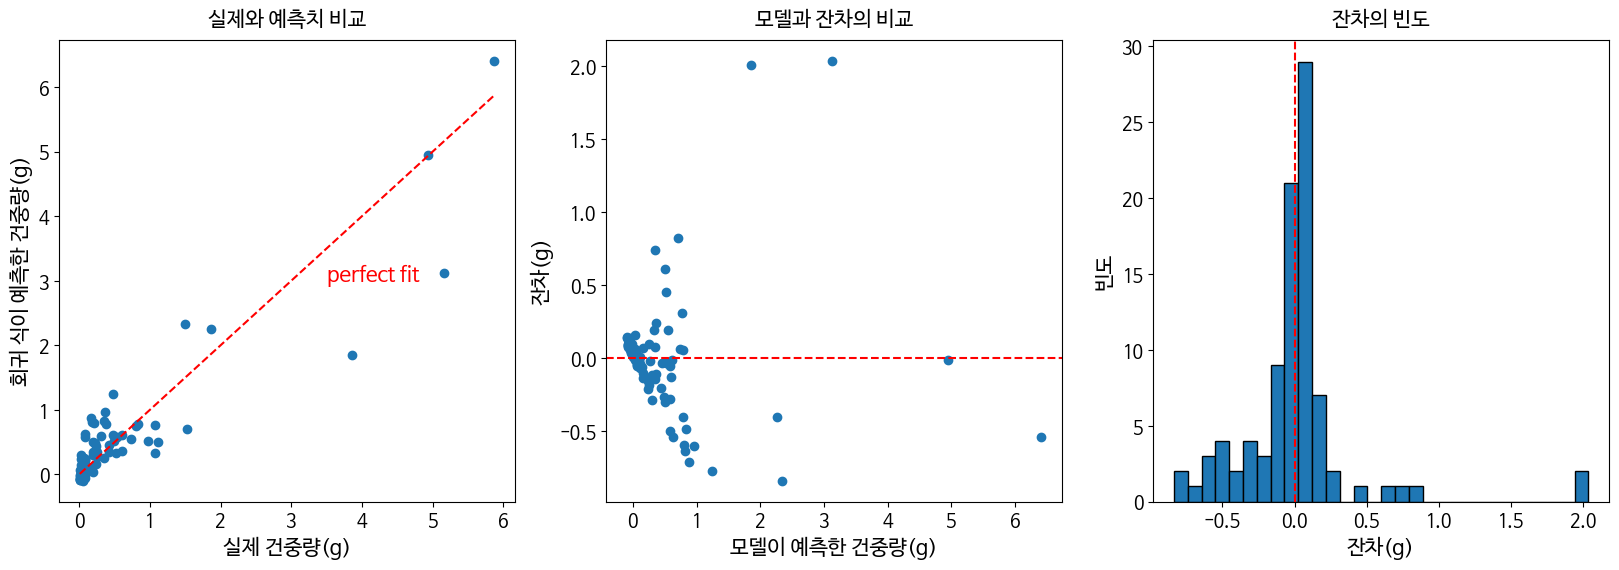

In [140]:
# 지수함수 회귀

# Define the model function
def model(X, a, b, c, d, e) :
    x_1, x_2, x_3 = X
    return a * np.exp(b * x_1 + c * x_2 + d * x_3) + e

x_1 = herb['줄기길이(cm)'].to_numpy()
x_2 = herb['줄기수(개)'].to_numpy()
x_3 = herb['높이(cm)'].to_numpy()
y = herb['지상부 건중량(g)'].to_numpy()

# Flatten variables for curve_fit
x_1 = x_1.flatten()
x_2 = x_2.flatten()
x_3 = x_3.flatten()
y = y.flatten()

# Fit the model
initial_guess = [0.1, 0.1, 0.1, 0.1, 0.1]  # Initial guesses for a, b, c, d
params, covariance = curve_fit(model, (x_1, x_2, x_3), y, p0 = initial_guess)

# Extract fitted parameters
a, b, c, d, e = params
print(f'Fitted Parameters: a = {a}, b = {b}, c = {c}, d = {d}, e = {e}')
print(f'y = {a} * exp({b} * x_1 + {c} * x_2 + {d} * x_3) + {e}')

# Predict using the fitted model
y_pred = model((x_1, x_2, x_3), a, b, c, d, e)

# Compute residuals
residuals = y - y_pred

# Metrics for goodness-of-fit
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

# Visualization
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 6))

# 1. Actual vs Predicted
ax[0].scatter(y, y_pred)
ax[0].plot([min(y), max(y)], [min(y), max(y)], linestyle = '--', color = 'red')
ax[0].text(x = 3.5, y = 3, s = 'perfect fit', color = 'red', fontsize = 15)
ax[0].set_xlabel("실제 건중량(g)", fontsize = 15)
ax[0].set_ylabel("회귀 식이 예측한 건중량(g)", fontsize = 15)
ax[0].set_title("실제와 예측치 비교", fontsize = 15, pad = 10)

# 2. Residuals
ax[1].scatter(y_pred, residuals)
ax[1].axhline(0, color='red', linestyle='--')
ax[1].set_xlabel('모델이 예측한 건중량(g)', fontsize = 15)
ax[1].set_ylabel('잔차(g)', fontsize = 15)
ax[1].set_title('모델과 잔차의 비교', fontsize = 15, pad = 10)

# 3. Distribution of Residuals
ax[2].hist(residuals, bins = 30, edgecolor = 'black')
ax[2].axvline(0, color='red', linestyle='--')
ax[2].set_xlabel('잔차(g)', fontsize = 15)
ax[2].set_ylabel('빈도', fontsize = 15)
ax[2].set_title('잔차의 빈도', fontsize = 15, pad = 10)

# x, y 축 눈금 크기 조정
for ax_i in ax:
    ax_i.tick_params(axis = 'both', labelsize = 13)
plt.show()

Fitted Parameters : a = -1.824157736430902, b = 0.026175821918603136, c = 0.06822210896738926, d = 0.01144510628866359
log(y) = -1.824157736430902 + 0.026175821918603136 * x_1 + 0.06822210896738926 * x_2 + 0.01144510628866359 * x_3
R-squared: -0.40923259789224353
Mean Absolute Error: 0.3004765732712696
Root Mean Squared Error: 1.22270632465682


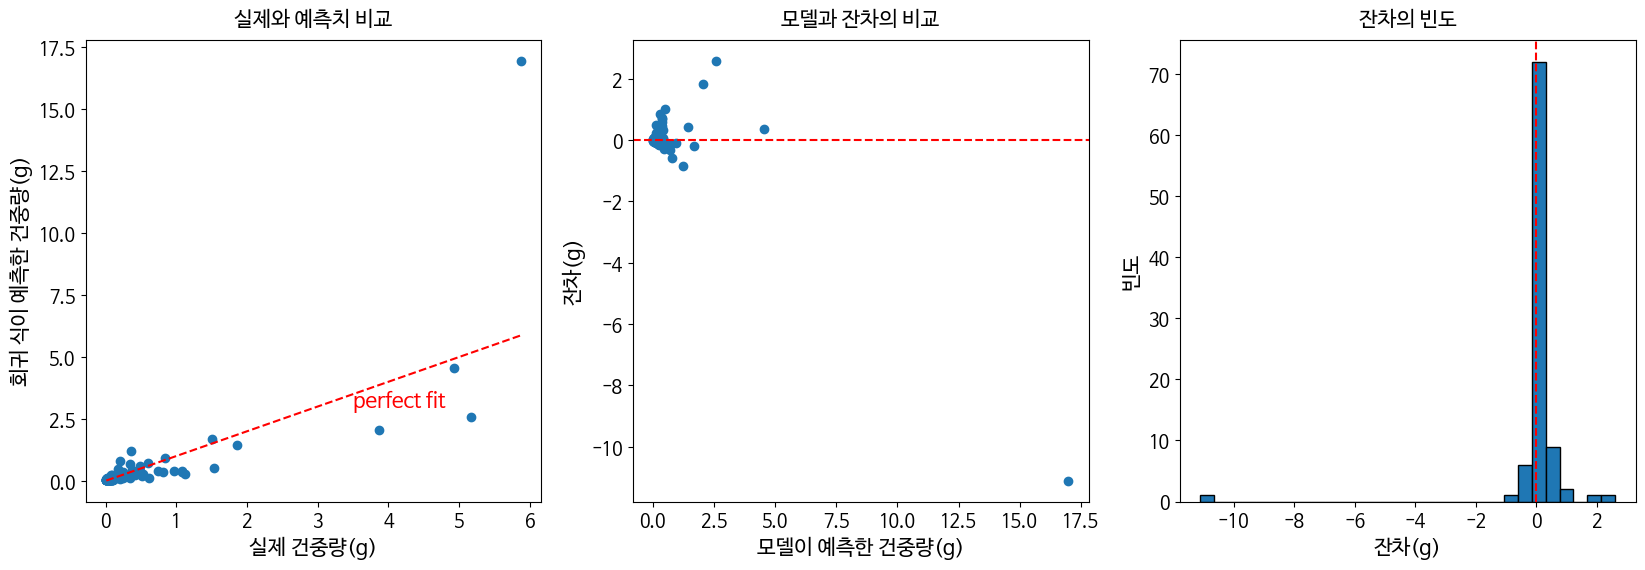

In [141]:
# 로그함수 회귀

x_1 = herb['줄기길이(cm)'].to_numpy()
x_2 = herb['줄기수(개)'].to_numpy()
x_3 = herb['높이(cm)'].to_numpy()
y = herb['지상부 건중량(g)'].to_numpy()

# Transform y to log scale
log_y = np.log10(y)

# Prepare the data matrix
X = np.column_stack((x_1, x_2, x_3))

# Fit linear regression model
model = LinearRegression()
model.fit(X, log_y)

# Extract coefficients
a = model.intercept_
b, c, d = model.coef_
print(f"Fitted Parameters : a = {a}, b = {b}, c = {c}, d = {d}")
print(f'log(y) = {a} + {b} * x_1 + {c} * x_2 + {d} * x_3')

# Predict log(y) and back-transform to y
log_y_pred = model.predict(X)
y_pred = 10 ** (log_y_pred)

# Compute residuals
residuals = y - y_pred

# Metrics for goodness-of-fit
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

# Visualization
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 6))

# 1. Actual vs Predicted
ax[0].scatter(y, y_pred)
ax[0].plot([min(y), max(y)], [min(y), max(y)], linestyle = '--', color = 'red')
ax[0].text(x = 3.5, y = 3, s = 'perfect fit', color = 'red', fontsize = 15)
ax[0].set_xlabel("실제 건중량(g)", fontsize = 15)
ax[0].set_ylabel("회귀 식이 예측한 건중량(g)", fontsize = 15)
ax[0].set_title("실제와 예측치 비교", fontsize = 15, pad = 10)

# 2. Residuals
ax[1].scatter(y_pred, residuals)
ax[1].axhline(0, color='red', linestyle='--')
ax[1].set_xlabel('모델이 예측한 건중량(g)', fontsize = 15)
ax[1].set_ylabel('잔차(g)', fontsize = 15)
ax[1].set_title('모델과 잔차의 비교', fontsize = 15, pad = 10)

# 3. Distribution of Residuals
ax[2].hist(residuals, bins = 30, edgecolor = 'black')
ax[2].axvline(0, color='red', linestyle='--')
ax[2].set_xlabel('잔차(g)', fontsize = 15)
ax[2].set_ylabel('빈도', fontsize = 15)
ax[2].set_title('잔차의 빈도', fontsize = 15, pad = 10)

# x, y 축 눈금 크기 조정
for ax_i in ax:
    ax_i.tick_params(axis = 'both', labelsize = 13)
plt.show()

Fitted Parameters: a = 0.07984642897739018, b = 0.48388163131021567, c = 1.4199057633484866, d = 0.6111546693643963, e = -0.6093099739306524
y = 0.07984642897739018 * (x_1 ** 0.48388163131021567 + x_2 ** 1.4199057633484866 + x_3 ** 0.6111546693643963) + -0.6093099739306524
R-squared: 0.805552276134966
Mean Absolute Error: 0.27523001532975677
Root Mean Squared Error: 0.45418443868395836


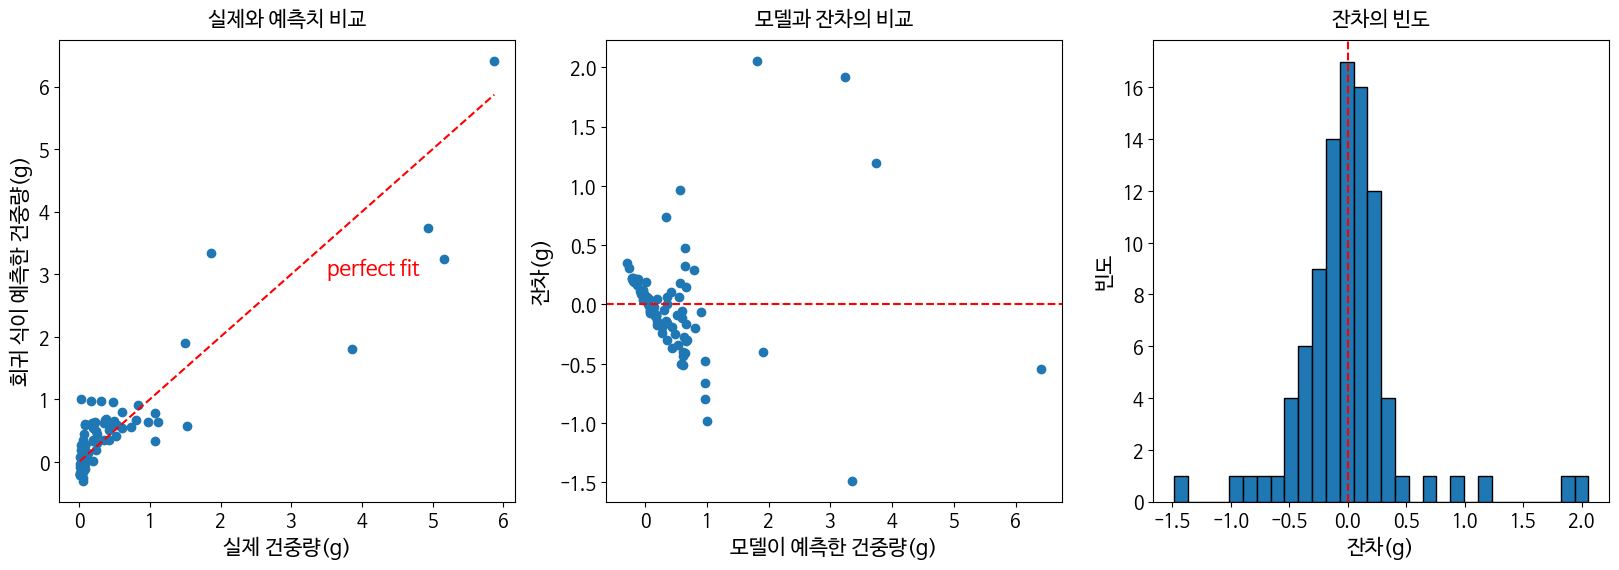

In [142]:
# 멱함수 회귀

# Define the model function
def model(X, a, b, c, d, e) :
    x_1, x_2, x_3 = X
    return a * (x_1 ** b + x_2 ** c + x_3 ** d) + e

x_1 = herb['줄기길이(cm)'].to_numpy()
x_2 = herb['줄기수(개)'].to_numpy()
x_3 = herb['높이(cm)'].to_numpy()
y = herb['지상부 건중량(g)'].to_numpy()

# Flatten variables for curve_fit
x_1 = x_1.flatten()
x_2 = x_2.flatten()
x_3 = x_3.flatten()
y = y.flatten()

# Fit the model
initial_guess = [0.1, 0.1, 0.1, 0.1, 0.1]  # Initial guesses for a, b, c, d, e
params, covariance = curve_fit(model, (x_1, x_2, x_3), y, p0 = initial_guess)

# Extract fitted parameters
a, b, c, d, e = params
print(f'Fitted Parameters: a = {a}, b = {b}, c = {c}, d = {d}, e = {e}')
print(f'y = {a} * (x_1 ** {b} + x_2 ** {c} + x_3 ** {d}) + {e}')

# Predict using the fitted model
y_pred = model((x_1, x_2, x_3), a, b, c, d, e)

# Compute residuals
residuals = y - y_pred

# Metrics for goodness-of-fit
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

# Visualization
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 6))

# 1. Actual vs Predicted
ax[0].scatter(y, y_pred)
ax[0].plot([min(y), max(y)], [min(y), max(y)], linestyle = '--', color = 'red')
ax[0].text(x = 3.5, y = 3, s = 'perfect fit', color = 'red', fontsize = 15)
ax[0].set_xlabel("실제 건중량(g)", fontsize = 15)
ax[0].set_ylabel("회귀 식이 예측한 건중량(g)", fontsize = 15)
ax[0].set_title("실제와 예측치 비교", fontsize = 15, pad = 10)

# 2. Residuals
ax[1].scatter(y_pred, residuals)
ax[1].axhline(0, color='red', linestyle='--')
ax[1].set_xlabel('모델이 예측한 건중량(g)', fontsize = 15)
ax[1].set_ylabel('잔차(g)', fontsize = 15)
ax[1].set_title('모델과 잔차의 비교', fontsize = 15, pad = 10)

# 3. Distribution of Residuals
ax[2].hist(residuals, bins = 30, edgecolor = 'black')
ax[2].axvline(0, color='red', linestyle='--')
ax[2].set_xlabel('잔차(g)', fontsize = 15)
ax[2].set_ylabel('빈도', fontsize = 15)
ax[2].set_title('잔차의 빈도', fontsize = 15, pad = 10)

# x, y 축 눈금 크기 조정
for ax_i in ax:
    ax_i.tick_params(axis = 'both', labelsize = 13)
plt.show()

# 1.2. 지하부 건중량 선형회귀(독립변수: 지상부 건중량, 종속변수: 지하부 건중량)

In [148]:
# LinearRegression 사용
x = herb['지상부 건중량(g)'].to_numpy()
x = x.reshape(-1, 1)
y = herb['지하부 건중량(g)'].to_numpy()
y = y.reshape(-1, 1)
train_input, test_input, train_target, test_target = train_test_split(x, y, test_size = 0.2, random_state = 42)
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.coef_, lr.intercept_)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

[[4.25684025]] [-0.57311348]
0.8402181430685012
0.31171695639001795


Fitted Parameters: a=4.0017658363444095, b=-0.4816751333757641
y = 4.0017658363444095x + -0.4816751333757641
R-squared: 0.8187777476581309
Mean Absolute Error: 1.0553535768881337
Root Mean Squared Error: 1.939122469569934


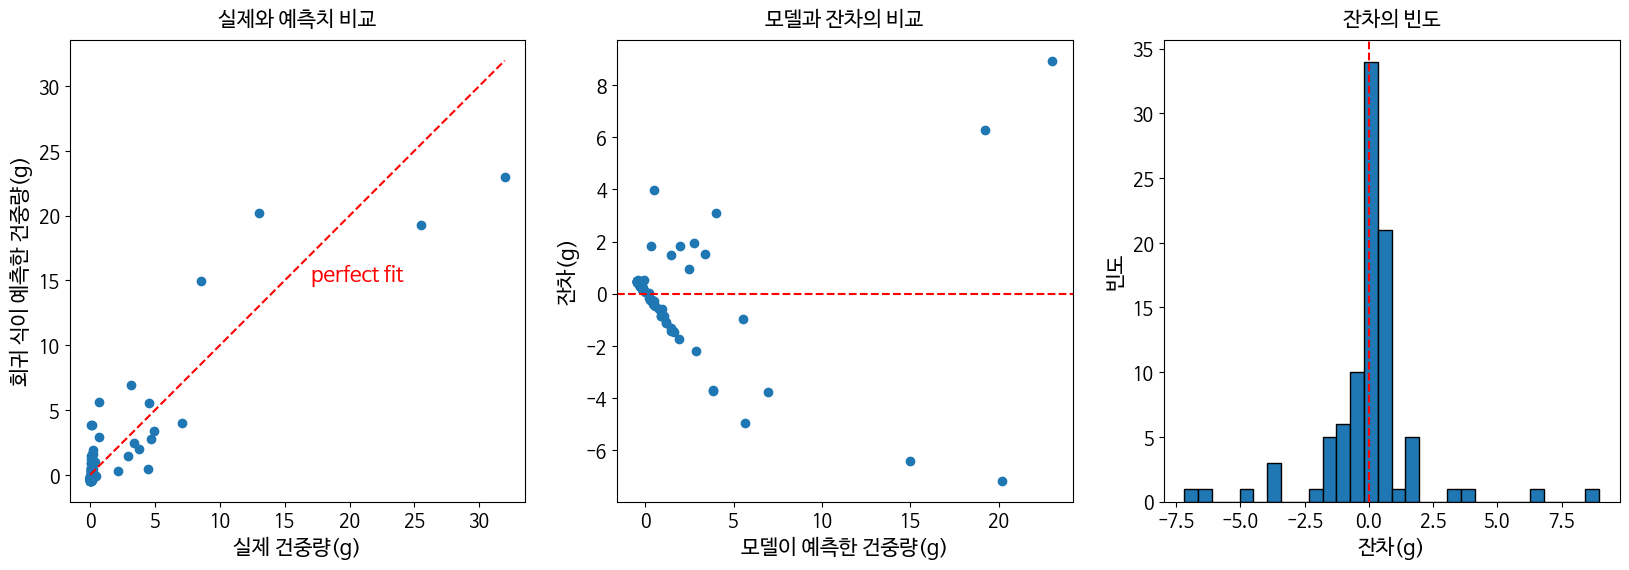

In [176]:
# scipy 사용

# Define the model function
def model(X, a, b) :
    x = X
    return a * x + b

x = herb['지상부 건중량(g)'].to_numpy()
y = herb['지하부 건중량(g)'].to_numpy()

# Flatten variables for curve_fit
x = x.flatten()
y = y.flatten()

# Fit the model
initial_guess = [0.1, 0.1]  # Initial guesses for a, b, c, d
params, covariance = curve_fit(model, x, y, p0 = initial_guess)

# Extract fitted parameters
a, b = params
print(f"Fitted Parameters: a={a}, b={b}")
print(f'y = {a}x + {b}')

# Predict using the fitted model
y_pred = model(x, a, b)

# Compute residuals
residuals = y - y_pred

# Metrics for goodness-of-fit
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

# Visualization
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 6))

# 1. Actual vs Predicted
ax[0].scatter(y, y_pred)
ax[0].plot([min(y), max(y)], [min(y), max(y)], linestyle = '--', color = 'red')
ax[0].text(x = 17, y = 15, s = 'perfect fit', color = 'red', fontsize = 15)
ax[0].set_xlabel("실제 건중량(g)", fontsize = 15)
ax[0].set_ylabel("회귀 식이 예측한 건중량(g)", fontsize = 15)
ax[0].set_title("실제와 예측치 비교", fontsize = 15, pad = 10)

# 2. Residuals
ax[1].scatter(y_pred, residuals)
ax[1].axhline(0, color='red', linestyle='--')
ax[1].set_xlabel('모델이 예측한 건중량(g)', fontsize = 15)
ax[1].set_ylabel('잔차(g)', fontsize = 15)
ax[1].set_title('모델과 잔차의 비교', fontsize = 15, pad = 10)

# 3. Distribution of Residuals
ax[2].hist(residuals, bins = 30, edgecolor = 'black')
ax[2].axvline(0, color='red', linestyle='--')
ax[2].set_xlabel('잔차(g)', fontsize = 15)
ax[2].set_ylabel('빈도', fontsize = 15)
ax[2].set_title('잔차의 빈도', fontsize = 15, pad = 10)

# x, y 축 눈금 크기 조정
for ax_i in ax:
    ax_i.tick_params(axis = 'both', labelsize = 13)
plt.show()

# 2. 교목

In [184]:
# 데이터프레임 생성
tree = pd.read_csv('/content/drive/MyDrive/forest_measurement/biomass_tree.csv') # change to your own file path

In [185]:
# 데이터프레임 확인
tree

,조,번호,수종,흉고직경(cm),수고(m)
0,1,1,잣나무,28,15.5
1,1,2,잣나무,37,18.5
2,1,3,잣나무,35,16.1
3,1,4,잣나무,22,13.0
4,2,1,잣나무,29,22.8
5,2,2,잣나무,48,24.4
6,2,3,잣나무,47,27.3
7,3,1,잣나무,33,18.0
8,3,2,잣나무,27,18.1
9,3,3,잣나무,49,23.0


In [186]:
# 데이터프레임 정보
tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   조         29 non-null     int64  
 1   번호        29 non-null     int64  
 2   수종        29 non-null     object 
 3   흉고직경(cm)  29 non-null     int64  
 4   수고(m)     29 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.3+ KB


In [187]:
# 데이터프레임 통계 요약
tree.describe()

,조,번호,흉고직경(cm),수고(m)
count,29.000000,29.000000,29.000000,29.000000
mean,3.275862,4.137931,31.310345,19.413793
std,1.250616,2.824942,8.755013,3.087963
min,1.000000,1.000000,18.000000,13.000000
25%,3.000000,2.000000,24.000000,18.000000
50%,4.000000,3.000000,30.000000,18.700000
75%,4.000000,6.000000,37.000000,21.000000
max,5.000000,11.000000,49.000000,27.300000


# 2.1. 입목수간재적표(국립산림과학원, 2023)를 이용하는 방법

In [43]:
# 수간재적 추가하기
tree['수간재적(m^3)'] = float(0)
stem_volume = {0 : 0.4769, 1 : 0.9508, 2 : 0.7224,
               3 : 0.2474, 4 : 0.7312, 5 : 1.9464,
               6 : 2.1055, 7 : 0.7282, 8 : 0.5012,
               9 : 1.9382, 10 : 0.4470, 11 : 0.6436,
               12 : 0.5289, 13 : 1.3230, 14 : 0.5189,
               15 : 0.3421, 16 : 0.3421, 17 : 0.8401,
               18 : 0.4470, 19 : 0.9404, 20 : 0.5192,
               21 : 0.8020, 22 : 0.2864, 23 : 0.2222,
               24 : 0.2864, 25 : 1.0007, 26 : 0.7698,
               27 : 0.3901, 28 : 1.0485}
for i in range(len(tree)) :
    tree.loc[i, '수간재적(m^3)'] = stem_volume[i]
tree

,조,번호,수종,흉고직경(cm),수고(m),수간재적(m^3)
0,1,1,잣나무,28,15.5,0.4769
1,1,2,잣나무,37,18.5,0.9508
2,1,3,잣나무,35,16.1,0.7224
3,1,4,잣나무,22,13.0,0.2474
4,2,1,잣나무,29,22.8,0.7312
5,2,2,잣나무,48,24.4,1.9464
6,2,3,잣나무,47,27.3,2.1055
7,3,1,잣나무,33,18.0,0.7282
8,3,2,잣나무,27,18.1,0.5012
9,3,3,잣나무,49,23.0,1.9382


# 2.1.1. 수간재적의 합을 이용하는 방법

In [44]:
# 수간재적 합 구하기
stem_volume = tree['수간재적(m^3)'].to_numpy()
stem_volume = sum(stem_volume)
print(stem_volume)

22.0466


In [45]:
# 수간바이오매스 구하기 (목재기본밀도 = 0.408 ton/m^3 (국립산림과학원, 2014))
stem_biomass = stem_volume * 0.408
print(stem_biomass)

8.9950128


In [46]:
# 지상부 바이오매스 구하기 (바이오매스 확장계수 = 1.812 (국립산림과학원, 2014))
above_biomass = stem_biomass * 1.812
print(above_biomass)

16.2989631936


In [47]:
# 지하부 바이오매스 구하기 (뿌리함량비 = 0.283 (국립산림과학원, 2014))
below_biomass = above_biomass * 0.283
print(below_biomass)

4.612606583788799


In [48]:
# 임목 전체 바이오매스 구하기
total_biomass = above_biomass + below_biomass
print(total_biomass)

20.9115697773888


In [49]:
# 임목 전체 탄소량 구하기 (탄소전환계수 = 0.501 (국립산림과학원, 2010))
tree_carbon = total_biomass * 0.501
print(tree_carbon)

10.476696458471789


In [50]:
# 전체 대상지로 확장 (확장계수 = 26.4/0.05)
total_carbon = tree_carbon * 26.4 / 0.05
print(total_carbon)

5531.695730073104


# 2.1.2. 개체목 별로 탄소 저장량을 구하는 방법

In [51]:
# 수간바이오매스 추가 (목재기본밀도 = 0.408 (국립산림과학원, 2014))
tree['수간바이오매스(ton)'] = float(0)
for i in range(len(tree)) :
    tree.loc[i, '수간바이오매스(ton)'] = tree.loc[i, '수간재적(m^3)'] * 0.408
tree

,조,번호,수종,흉고직경(cm),수고(m),수간재적(m^3),수간바이오매스(ton)
0,1,1,잣나무,28,15.5,0.4769,0.194575
1,1,2,잣나무,37,18.5,0.9508,0.387926
2,1,3,잣나무,35,16.1,0.7224,0.294739
3,1,4,잣나무,22,13.0,0.2474,0.100939
4,2,1,잣나무,29,22.8,0.7312,0.298330
5,2,2,잣나무,48,24.4,1.9464,0.794131
6,2,3,잣나무,47,27.3,2.1055,0.859044
7,3,1,잣나무,33,18.0,0.7282,0.297106
8,3,2,잣나무,27,18.1,0.5012,0.204490
9,3,3,잣나무,49,23.0,1.9382,0.790786


In [52]:
# 지상부 바이오매스 추가 (바이오매스 확장계수 = 1.812 (국립산림과학원, 2014))
tree['지상부 바이오매스(ton)'] = float(0)
for i in range(len(tree)) :
    tree.loc[i, '지상부 바이오매스(ton)'] = tree.loc[i, '수간바이오매스(ton)'] * 1.812
tree

,조,번호,수종,흉고직경(cm),수고(m),수간재적(m^3),수간바이오매스(ton),지상부 바이오매스(ton)
0,1,1,잣나무,28,15.5,0.4769,0.194575,0.352570
1,1,2,잣나무,37,18.5,0.9508,0.387926,0.702923
2,1,3,잣나무,35,16.1,0.7224,0.294739,0.534067
3,1,4,잣나무,22,13.0,0.2474,0.100939,0.182902
4,2,1,잣나무,29,22.8,0.7312,0.298330,0.540573
5,2,2,잣나무,48,24.4,1.9464,0.794131,1.438966
6,2,3,잣나무,47,27.3,2.1055,0.859044,1.556588
7,3,1,잣나무,33,18.0,0.7282,0.297106,0.538355
8,3,2,잣나무,27,18.1,0.5012,0.204490,0.370535
9,3,3,잣나무,49,23.0,1.9382,0.790786,1.432904


In [53]:
# 지하부 바이오매스 추가 (뿌리함량비 = 0.283 (국립산림과학원, 2014))
tree['지하부 바이오매스(ton)'] = float(0)
for i in range(len(tree)) :
    tree.loc[i, '지하부 바이오매스(ton)'] = tree.loc[i, '지상부 바이오매스(ton)'] * 0.283
tree

,조,번호,수종,흉고직경(cm),수고(m),수간재적(m^3),수간바이오매스(ton),지상부 바이오매스(ton),지하부 바이오매스(ton)
0,1,1,잣나무,28,15.5,0.4769,0.194575,0.352570,0.099777
1,1,2,잣나무,37,18.5,0.9508,0.387926,0.702923,0.198927
2,1,3,잣나무,35,16.1,0.7224,0.294739,0.534067,0.151141
3,1,4,잣나무,22,13.0,0.2474,0.100939,0.182902,0.051761
4,2,1,잣나무,29,22.8,0.7312,0.298330,0.540573,0.152982
5,2,2,잣나무,48,24.4,1.9464,0.794131,1.438966,0.407227
6,2,3,잣나무,47,27.3,2.1055,0.859044,1.556588,0.440514
7,3,1,잣나무,33,18.0,0.7282,0.297106,0.538355,0.152355
8,3,2,잣나무,27,18.1,0.5012,0.204490,0.370535,0.104861
9,3,3,잣나무,49,23.0,1.9382,0.790786,1.432904,0.405512


In [54]:
# 임목 전체 바이오매스 추가
tree['임목 전체 바이오매스(ton)'] = float(0)
for i in range(len(tree)) :
    tree.loc[i, '임목 전체 바이오매스(ton)'] = tree.loc[i, '지상부 바이오매스(ton)'] + tree.loc[i, '지하부 바이오매스(ton)']
tree

,조,번호,수종,흉고직경(cm),수고(m),수간재적(m^3),수간바이오매스(ton),지상부 바이오매스(ton),지하부 바이오매스(ton),임목 전체 바이오매스(ton)
0,1,1,잣나무,28,15.5,0.4769,0.194575,0.352570,0.099777,0.452348
1,1,2,잣나무,37,18.5,0.9508,0.387926,0.702923,0.198927,0.901850
2,1,3,잣나무,35,16.1,0.7224,0.294739,0.534067,0.151141,0.685209
3,1,4,잣나무,22,13.0,0.2474,0.100939,0.182902,0.051761,0.234663
4,2,1,잣나무,29,22.8,0.7312,0.298330,0.540573,0.152982,0.693555
5,2,2,잣나무,48,24.4,1.9464,0.794131,1.438966,0.407227,1.846193
6,2,3,잣나무,47,27.3,2.1055,0.859044,1.556588,0.440514,1.997102
7,3,1,잣나무,33,18.0,0.7282,0.297106,0.538355,0.152355,0.690710
8,3,2,잣나무,27,18.1,0.5012,0.204490,0.370535,0.104861,0.475397
9,3,3,잣나무,49,23.0,1.9382,0.790786,1.432904,0.405512,1.838415


In [55]:
# 임목 전체 탄소량 구하기 (탄소전환계수 = 0.501 (국립산림과학원, 2010))
tree['임목 전체 탄소 저장량(ton)'] = float(0)
for i in range(len(tree)) :
    tree.loc[i, '임목 전체 탄소저장량(ton)'] = tree.loc[i, '임목 전체 바이오매스(ton)'] * 0.501
tree

,조,번호,수종,흉고직경(cm),수고(m),수간재적(m^3),수간바이오매스(ton),지상부 바이오매스(ton),지하부 바이오매스(ton),임목 전체 바이오매스(ton),임목 전체 탄소 저장량(ton),임목 전체 탄소저장량(ton)
0,1,1,잣나무,28,15.5,0.4769,0.194575,0.352570,0.099777,0.452348,0.0,0.226626
1,1,2,잣나무,37,18.5,0.9508,0.387926,0.702923,0.198927,0.901850,0.0,0.451827
2,1,3,잣나무,35,16.1,0.7224,0.294739,0.534067,0.151141,0.685209,0.0,0.343289
3,1,4,잣나무,22,13.0,0.2474,0.100939,0.182902,0.051761,0.234663,0.0,0.117566
4,2,1,잣나무,29,22.8,0.7312,0.298330,0.540573,0.152982,0.693555,0.0,0.347471
5,2,2,잣나무,48,24.4,1.9464,0.794131,1.438966,0.407227,1.846193,0.0,0.924943
6,2,3,잣나무,47,27.3,2.1055,0.859044,1.556588,0.440514,1.997102,0.0,1.000548
7,3,1,잣나무,33,18.0,0.7282,0.297106,0.538355,0.152355,0.690710,0.0,0.346046
8,3,2,잣나무,27,18.1,0.5012,0.204490,0.370535,0.104861,0.475397,0.0,0.238174
9,3,3,잣나무,49,23.0,1.9382,0.790786,1.432904,0.405512,1.838415,0.0,0.921046


In [56]:
# 탄소저장량의 합 구하기
plot_carbon = tree['임목 전체 탄소저장량(ton)'].to_numpy()
plot_carbon = sum(plot_carbon)
print(plot_carbon)

10.476696458471789


In [57]:
# 전체 대상지로 확장 (확장계수 = 26.4/0.05)
total_carbon = plot_carbon * 26.4 / 0.05
print(total_carbon)

5531.695730073104


# 2.2. 입목바이오매스표(국립산림과학원, 2023) 이용

# 3. 어린 교목

In [150]:
# 데이터프레임 생성
young_tree = pd.read_csv('/content/drive/MyDrive/forest_measurement/biomass_tree_young.csv') # change to your own file path

In [151]:
# 데이터프레임 확인
young_tree

,조,번호,수종,흉고직경(cm),근원직경(cm),수고(cm),줄기 건중량(g),가지 건중량(g),잎 건중량(g),뿌리 건중량(g),전체 건중량(g)
0,1.0,1.0,물푸레,0.9,1.9,205.0,94.25,72.20,7.20,104.05,277.70
1,1.0,2.0,신갈나무,0.5,1.3,132.0,37.87,19.17,5.89,90.70,153.63
2,1.0,3.0,신갈나무,0,1.7,63.0,42.92,13.36,10.48,96.21,162.97
3,1.0,4.0,밤나무,2.2,2.9,217.0,189.37,212.82,10.88,129.68,542.75
4,1.0,5.0,밤나무,1.5,2.1,267.0,204.04,86.48,31.21,101.01,422.74
5,2.0,1.0,잣나무,0,0.1,8.0,0.06,0.00,0.17,0.01,0.24
6,2.0,2.0,잣나무,0,0.1,5.0,0.06,0.00,0.06,0.07,0.19
7,2.0,3.0,NaN,0,0.1,4.0,0.05,0.00,0.03,0.05,0.13
8,2.0,4.0,NaN,0,0.5,16.0,0.94,0.09,0.21,1.24,2.48
9,2.0,5.0,NaN,0,0.3,12.0,0.38,0.00,0.31,0.28,0.97


In [152]:
# 마지막 줄 제거
young_tree = young_tree.loc[ : 39]
young_tree

,조,번호,수종,흉고직경(cm),근원직경(cm),수고(cm),줄기 건중량(g),가지 건중량(g),잎 건중량(g),뿌리 건중량(g),전체 건중량(g)
0,1.0,1.0,물푸레,0.9,1.9,205.0,94.25,72.20,7.20,104.05,277.70
1,1.0,2.0,신갈나무,0.5,1.3,132.0,37.87,19.17,5.89,90.70,153.63
2,1.0,3.0,신갈나무,0,1.7,63.0,42.92,13.36,10.48,96.21,162.97
3,1.0,4.0,밤나무,2.2,2.9,217.0,189.37,212.82,10.88,129.68,542.75
4,1.0,5.0,밤나무,1.5,2.1,267.0,204.04,86.48,31.21,101.01,422.74
5,2.0,1.0,잣나무,0,0.1,8.0,0.06,0.00,0.17,0.01,0.24
6,2.0,2.0,잣나무,0,0.1,5.0,0.06,0.00,0.06,0.07,0.19
7,2.0,3.0,NaN,0,0.1,4.0,0.05,0.00,0.03,0.05,0.13
8,2.0,4.0,NaN,0,0.5,16.0,0.94,0.09,0.21,1.24,2.48
9,2.0,5.0,NaN,0,0.3,12.0,0.38,0.00,0.31,0.28,0.97


In [153]:
# 결측치 개수 확인하기
young_tree.isnull().sum()

,0
조,0
번호,0
수종,11
흉고직경(cm),0
근원직경(cm),2
수고(cm),0
줄기 건중량(g),0
가지 건중량(g),0
잎 건중량(g),0
뿌리 건중량(g),0


In [154]:
# 결측치의 처리
young_tree['수종'] = young_tree['수종'].fillna('미상') # 수종을 모르는 경우 미상으로 처리
young_tree = young_tree.drop(15) # 근원직경 데이터가 없는 경우 분석에서 제외
young_tree = young_tree.drop(37)
young_tree

<ipython-input-154-6e3cb387e9e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  young_tree['수종'] = young_tree['수종'].fillna('미상') # 수종을 모르는 경우 미상으로 처리


,조,번호,수종,흉고직경(cm),근원직경(cm),수고(cm),줄기 건중량(g),가지 건중량(g),잎 건중량(g),뿌리 건중량(g),전체 건중량(g)
0,1.0,1.0,물푸레,0.9,1.9,205.0,94.25,72.20,7.20,104.05,277.70
1,1.0,2.0,신갈나무,0.5,1.3,132.0,37.87,19.17,5.89,90.70,153.63
2,1.0,3.0,신갈나무,0,1.7,63.0,42.92,13.36,10.48,96.21,162.97
3,1.0,4.0,밤나무,2.2,2.9,217.0,189.37,212.82,10.88,129.68,542.75
4,1.0,5.0,밤나무,1.5,2.1,267.0,204.04,86.48,31.21,101.01,422.74
5,2.0,1.0,잣나무,0,0.1,8.0,0.06,0.00,0.17,0.01,0.24
6,2.0,2.0,잣나무,0,0.1,5.0,0.06,0.00,0.06,0.07,0.19
7,2.0,3.0,미상,0,0.1,4.0,0.05,0.00,0.03,0.05,0.13
8,2.0,4.0,미상,0,0.5,16.0,0.94,0.09,0.21,1.24,2.48
9,2.0,5.0,미상,0,0.3,12.0,0.38,0.00,0.31,0.28,0.97


In [155]:
# 데이터프레임 정보
young_tree.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 0 to 39
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   조          38 non-null     float64
 1   번호         38 non-null     float64
 2   수종         38 non-null     object 
 3   흉고직경(cm)   38 non-null     object 
 4   근원직경(cm)   38 non-null     float64
 5   수고(cm)     38 non-null     float64
 6   줄기 건중량(g)  38 non-null     float64
 7   가지 건중량(g)  38 non-null     float64
 8   잎 건중량(g)   38 non-null     float64
 9   뿌리 건중량(g)  38 non-null     float64
 10  전체 건중량(g)  38 non-null     float64
dtypes: float64(9), object(2)
memory usage: 3.6+ KB


In [156]:
# 근원직경의 데이터 타입 바꾸기
young_tree = young_tree.astype({'흉고직경(cm)' : 'float64'})
young_tree.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 0 to 39
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   조          38 non-null     float64
 1   번호         38 non-null     float64
 2   수종         38 non-null     object 
 3   흉고직경(cm)   38 non-null     float64
 4   근원직경(cm)   38 non-null     float64
 5   수고(cm)     38 non-null     float64
 6   줄기 건중량(g)  38 non-null     float64
 7   가지 건중량(g)  38 non-null     float64
 8   잎 건중량(g)   38 non-null     float64
 9   뿌리 건중량(g)  38 non-null     float64
 10  전체 건중량(g)  38 non-null     float64
dtypes: float64(10), object(1)
memory usage: 3.6+ KB


In [157]:
# 데이터프레임 통계 요약
young_tree.describe()

,조,번호,흉고직경(cm),근원직경(cm),수고(cm),줄기 건중량(g),가지 건중량(g),잎 건중량(g),뿌리 건중량(g),전체 건중량(g)
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,3.131579,4.894737,0.313158,0.747368,61.876316,46.700263,29.405263,3.818684,50.304737,130.228947
std,1.417479,3.343323,0.734174,0.962749,84.148567,114.772902,73.808318,7.914686,123.987807,315.126023
min,1.000000,1.000000,0.000000,0.000000,4.000000,0.010000,0.000000,0.010000,0.010000,0.030000
25%,2.000000,2.250000,0.000000,0.100000,12.500000,0.062500,0.000000,0.052500,0.055000,0.202500
50%,3.000000,4.000000,0.000000,0.300000,23.750000,0.380000,0.010000,0.200000,0.770000,1.745000
75%,4.750000,6.750000,0.000000,0.875000,66.000000,4.807500,1.122500,2.965000,6.790000,12.030000
max,5.000000,15.000000,2.400000,3.300000,320.000000,490.820000,280.200000,31.210000,483.070000,1268.160000


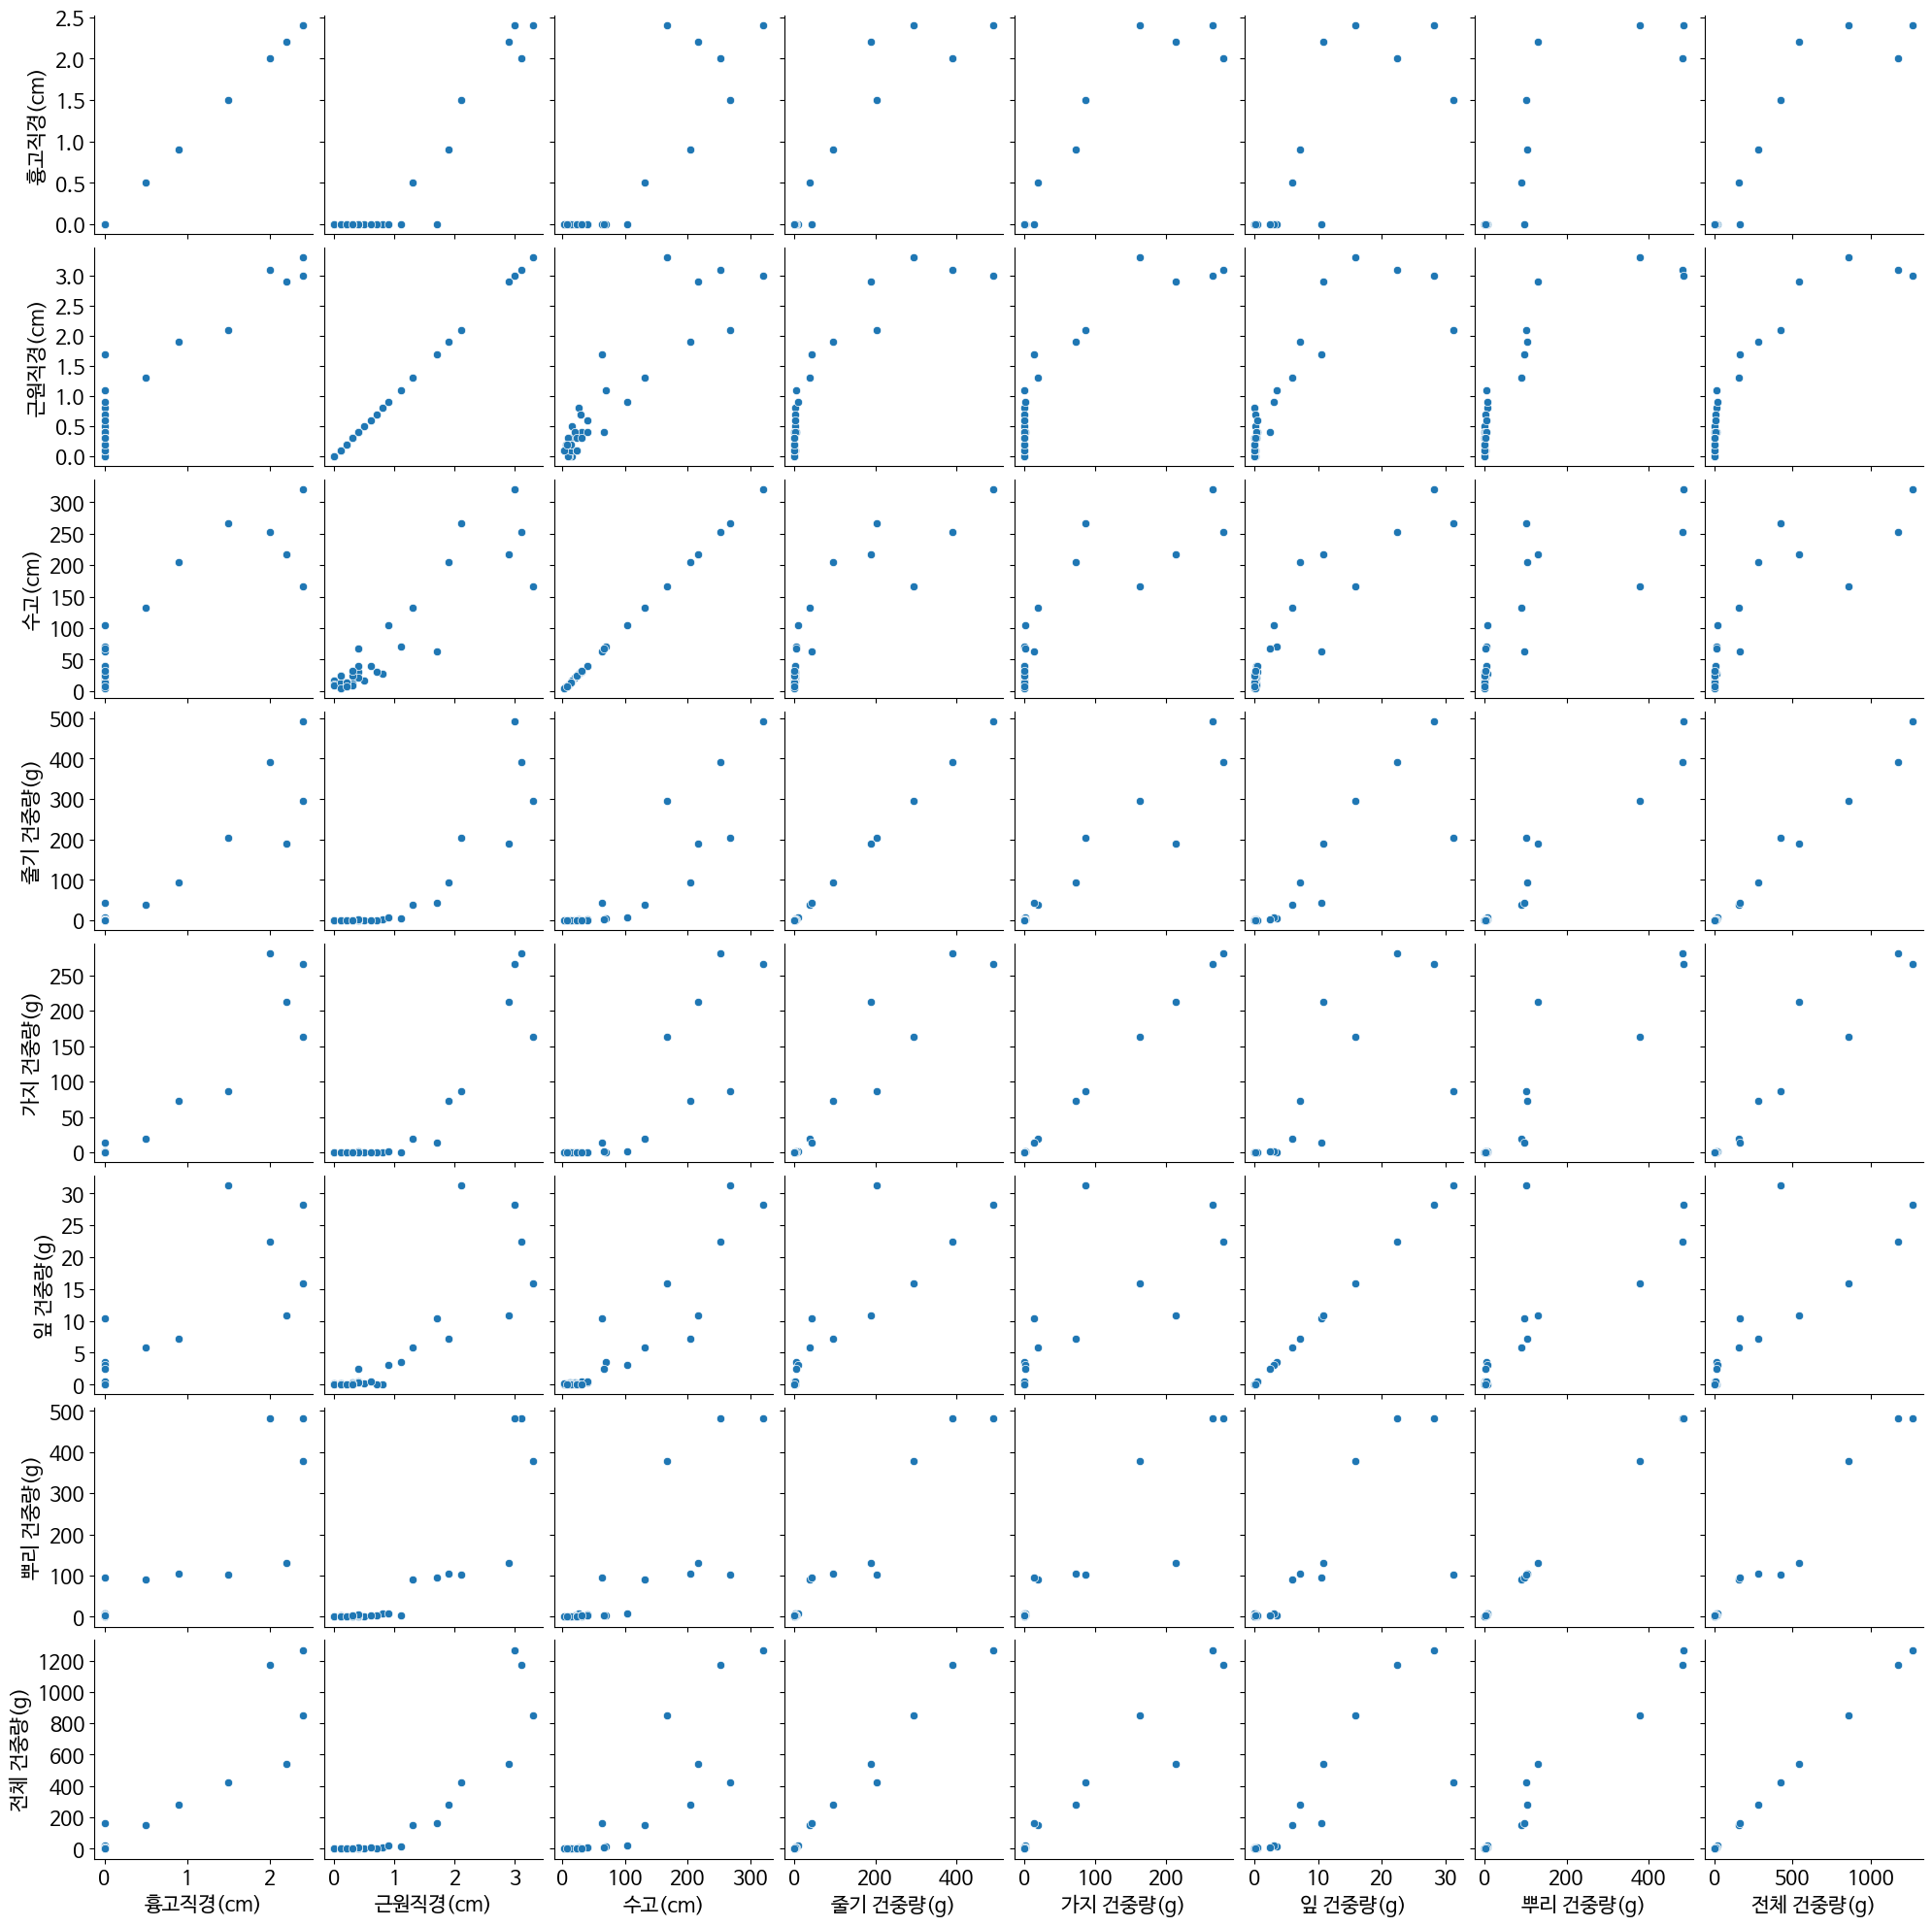

In [158]:
# Create a pair plot
g = sns.pairplot(data = young_tree.loc[:, '흉고직경(cm)' : '전체 건중량(g)'],
             kind = 'scatter',
             diag_kind = None,
             corner = False)

# Change font size of axes labels
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=15)
    ax.set_ylabel(ax.get_ylabel(), fontsize=15)

# Change font size of tick labels
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_fontsize(15)
    for label in ax.get_yticklabels():
        label.set_fontsize(15)

plt.savefig('/content/drive/MyDrive/forest_measurement/young_tree_pair_plot_all.png', dpi = 600, bbox_inches = 'tight') # change to your own file path
plt.show()

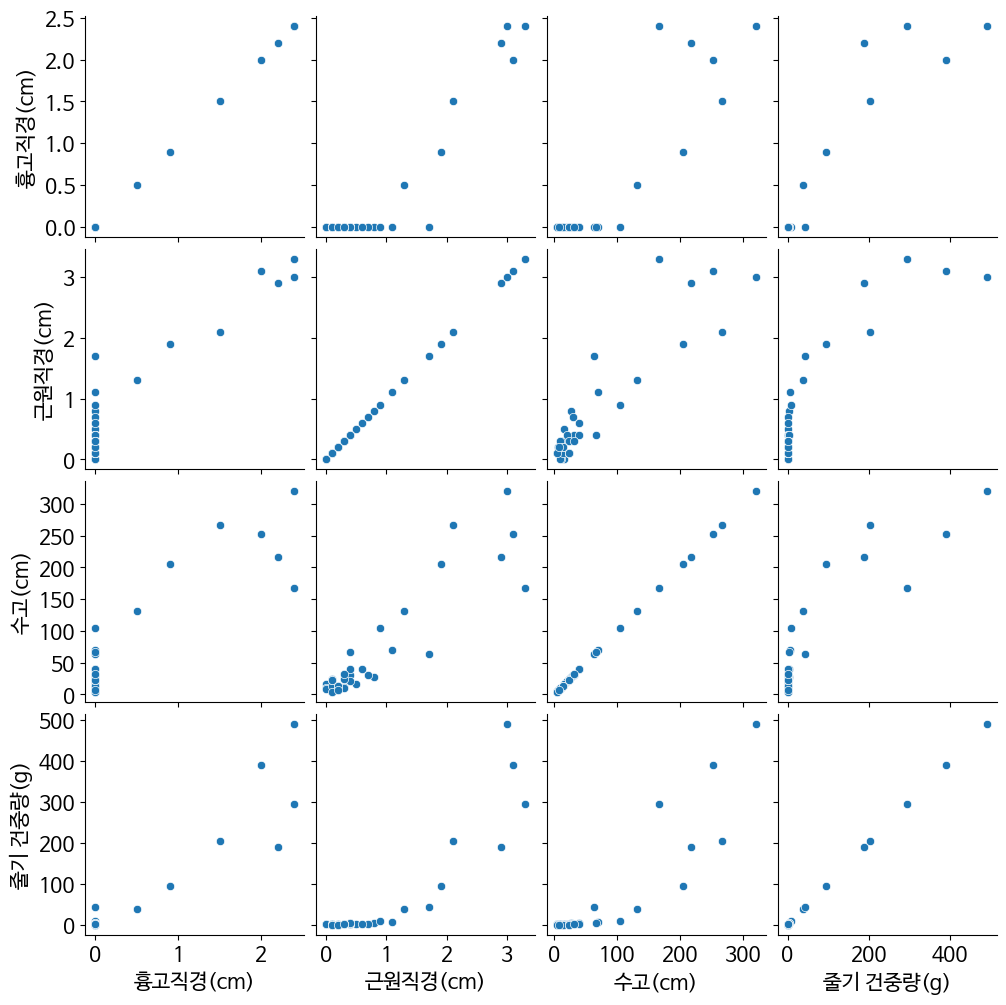

In [159]:
# Create a pair plot
g = sns.pairplot(data = young_tree[['흉고직경(cm)', '근원직경(cm)', '수고(cm)', '줄기 건중량(g)']],
             kind = 'scatter',
             diag_kind = None,
             corner = False)

# Change font size of axes labels
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=15)
    ax.set_ylabel(ax.get_ylabel(), fontsize=15)

# Change font size of tick labels
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_fontsize(15)
    for label in ax.get_yticklabels():
        label.set_fontsize(15)

plt.savefig('/content/drive/MyDrive/forest_measurement/young_tree_pair_plot_stem.png', dpi = 600, bbox_inches = 'tight') # change to your own file path
plt.show()

# 3.1. 회귀분석 (독립변수: 흉고직경, 근원직경, 수고, 종속변수: 줄기 건중량)

# 3.1.1. 머신러닝 기법 사용

In [162]:
# 데이터 만들기
data_1 = young_tree['흉고직경(cm)']
data_1 = data_1.to_numpy()
data_2 = young_tree['근원직경(cm)']
data_2 = data_2.to_numpy()
data_3 = young_tree['수고(cm)']
data_3 = data_3.to_numpy()
data = [[dbh, db, h] for dbh, db, h in zip(data_1, data_2, data_3)]
target = young_tree['전체 건중량(g)']
target = target.to_numpy()
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2, random_state = 42)

In [163]:
# 학습용 데이터를 데이터프레임으로 변환
train_young_tree = pd.DataFrame(data = train_input, columns = ['흉고직경(cm)', '근원직경(cm)', '수고(cm)'])
train_young_tree['줄기 건중량(g)'] = train_target
print(train_young_tree)
test_young_tree = pd.DataFrame(data = test_input, columns = ['흉고직경(cm)', '근원직경(cm)', '수고(cm)'])
test_young_tree['줄기 건중량(g)'] = test_target
print(test_young_tree)

    흉고직경(cm)  근원직경(cm)  수고(cm)  줄기 건중량(g)
0        2.4       3.3   167.0     853.46
1        0.0       0.9   104.0      19.98
2        0.0       0.4    40.0       8.81
3        0.0       0.5    16.0       2.48
4        0.0       0.4    67.0      10.86
5        0.0       0.8    27.0      10.75
6        0.0       0.3    24.0       1.66
7        0.0       0.3    12.0       0.97
8        0.0       0.1     4.0       0.77
9        0.9       1.9   205.0     277.70
10       2.4       3.0   320.0    1268.16
11       0.0       0.1     8.0       0.24
12       0.0       0.4    21.0       1.12
13       0.5       1.3   132.0     153.63
14       0.0       0.3    32.0       3.64
15       0.0       0.0    11.0       0.11
16       0.0       1.7    63.0     162.97
17       0.0       0.2    14.0       0.07
18       0.0       0.2     7.8       0.05
19       2.2       2.9   217.0     542.75
20       0.0       0.1    23.5       0.04
21       2.0       3.1   252.0    1174.98
22       0.0       0.1    24.0    

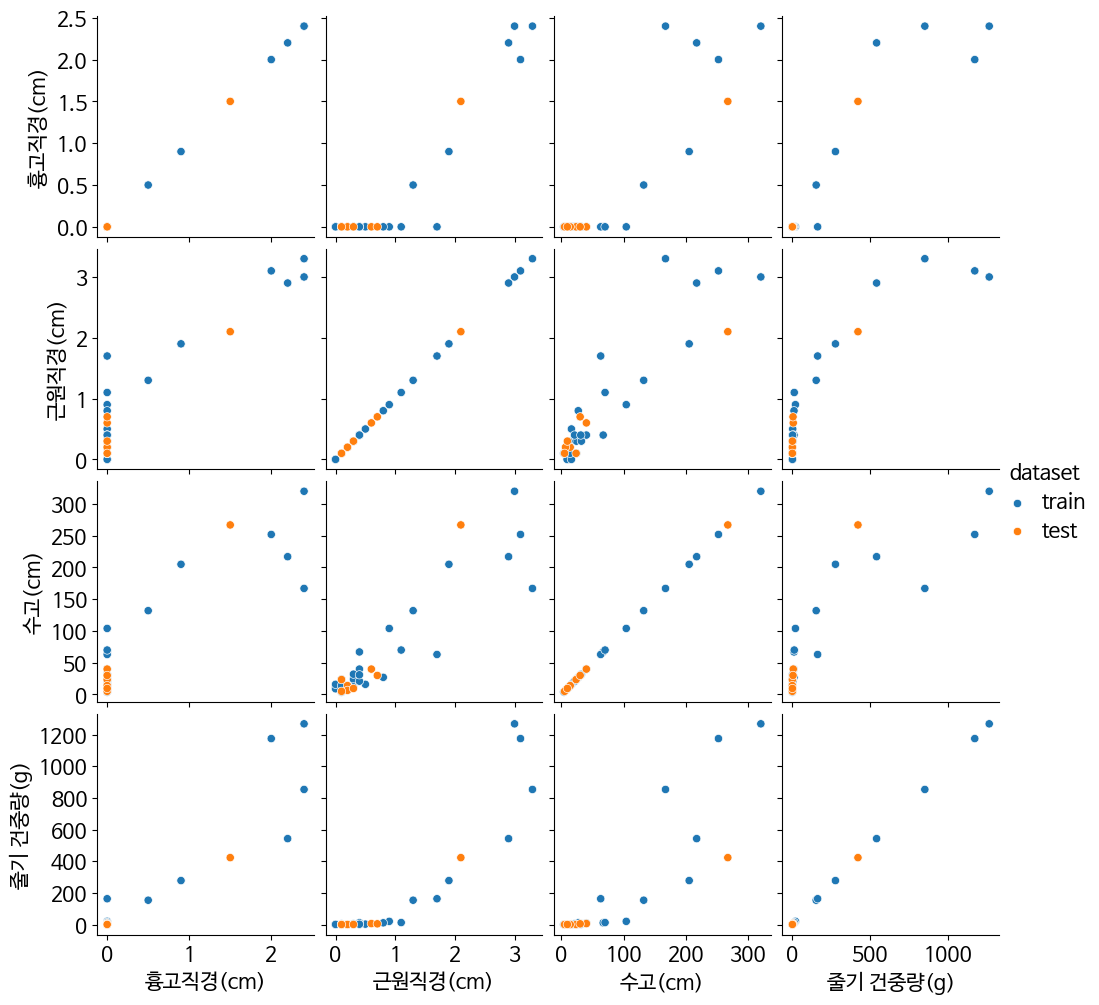

In [164]:
# 학습용 데이터와 테스트용 데이터를 그래프에 표시

# Concatenate the DataFrames
combined_young_tree = pd.concat([train_young_tree.assign(dataset='train'),
                           test_young_tree.assign(dataset='test')])

g = sns.pairplot(data=combined_young_tree, hue='dataset',
             kind='scatter', diag_kind=None, corner=False)

# Change font size of axes labels
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=15)
    ax.set_ylabel(ax.get_ylabel(), fontsize=15)

# Change font size of tick labels
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_fontsize(15)
    for label in ax.get_yticklabels():
        label.set_fontsize(15)

legend = g._legend  # Access the legend object
title = legend.get_title()
title.set_fontsize(15)  # Set desired font size
for text in legend.texts:
    text.set_fontsize(15)  # Set desired font size

plt.savefig('/content/drive/MyDrive/forest_measurement/young_tree_pair_plot_train_test.png', dpi = 600, bbox_inches = 'tight') # change to your own file path
plt.show()

In [166]:
# 모델 만들기
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.coef_, lr.intercept_)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

[302.90390171   0.8803595    1.15068242] -30.237063894910932
0.9026089123913386
0.3673734740517369


In [167]:
# 다항선형회귀 모델 만들기
poly = PolynomialFeatures()
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(poly.get_feature_names_out())
print(lr.coef_, lr.intercept_)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

['1' 'x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2']
[ 0.00000000e+00 -8.66766561e+02 -1.47035528e+01  1.47077488e+00
 -6.86468118e+02  6.11511679e+02  4.85889435e+00  2.08347293e+02
 -5.20673951e+00  1.82405029e-02] -19.774646090712565
0.9931569510237381
0.6024034437845501


In [168]:
# RandomForest 사용
rf = RandomForestRegressor(n_estimators = 1000,
                           criterion = 'squared_error',
                           n_jobs = -1)
rf.fit(train_input, train_target)
scores = cross_validate(rf, train_input, train_target, return_train_score = True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9686205498283215 -9.539256714930719


Fitted Parameters: a = 9.892105064418685e-05, b = 3.754176718948881, c = 12.355592406243359, d = 2.638079976306353, e = -0.4868825946278346
y = 9.892105064418685e-05 * (x_1 ** 3.754176718948881 + x_2 ** 12.355592406243359 + x_3 ** 2.638079976306353) + -0.4868825946278346
R-squared: 0.9811646934870251
Mean Absolute Error: 6.628476562084181
Root Mean Squared Error: 15.542997325600696


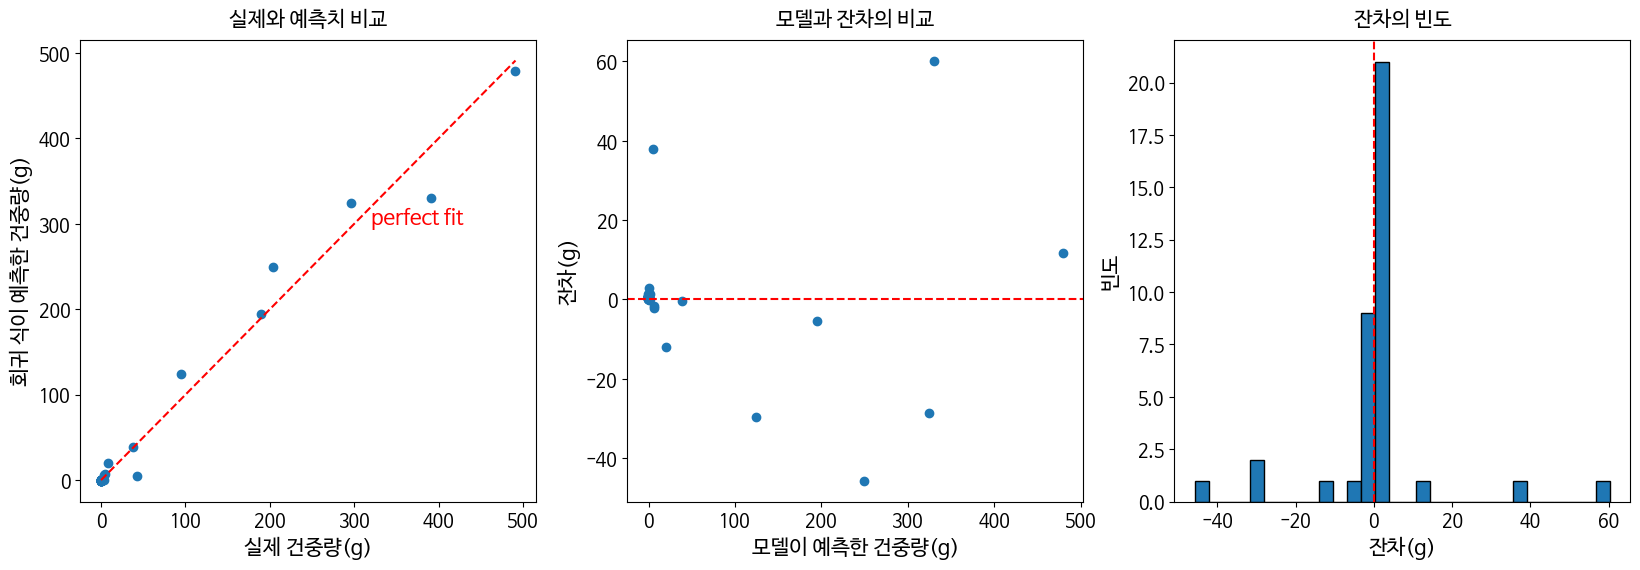

In [174]:
# 멱함수 회귀

# Define the model function
def model(X, a, b, c, d, e) :
    x_1, x_2, x_3 = X
    return a * (x_1 ** b + x_2 ** c + x_3 ** d) + e

x_1 = young_tree['흉고직경(cm)'].to_numpy()
x_2 = young_tree['근원직경(cm)'].to_numpy()
x_3 = young_tree['수고(cm)'].to_numpy()
y = young_tree['줄기 건중량(g)'].to_numpy()

# Flatten variables for curve_fit
x_1 = x_1.flatten()
x_2 = x_2.flatten()
x_3 = x_3.flatten()
y = y.flatten()

# Fit the model
initial_guess = [0.1, 0.1, 0.1, 0.1, 0.1]  # Initial guesses for a, b, c, d, e
params, covariance = curve_fit(model, (x_1, x_2, x_3), y, p0 = initial_guess)

# Extract fitted parameters
a, b, c, d, e = params
print(f'Fitted Parameters: a = {a}, b = {b}, c = {c}, d = {d}, e = {e}')
print(f'y = {a} * (x_1 ** {b} + x_2 ** {c} + x_3 ** {d}) + {e}')

# Predict using the fitted model
y_pred = model((x_1, x_2, x_3), a, b, c, d, e)

# Compute residuals
residuals = y - y_pred

# Metrics for goodness-of-fit
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

# Visualization
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 6))

# 1. Actual vs Predicted
ax[0].scatter(y, y_pred)
ax[0].plot([min(y), max(y)], [min(y), max(y)], linestyle = '--', color = 'red')
ax[0].text(x = 320, y = 300, s = 'perfect fit', color = 'red', fontsize = 15)
ax[0].set_xlabel("실제 건중량(g)", fontsize = 15)
ax[0].set_ylabel("회귀 식이 예측한 건중량(g)", fontsize = 15)
ax[0].set_title("실제와 예측치 비교", fontsize = 15, pad = 10)

# 2. Residuals
ax[1].scatter(y_pred, residuals)
ax[1].axhline(0, color='red', linestyle='--')
ax[1].set_xlabel('모델이 예측한 건중량(g)', fontsize = 15)
ax[1].set_ylabel('잔차(g)', fontsize = 15)
ax[1].set_title('모델과 잔차의 비교', fontsize = 15, pad = 10)

# 3. Distribution of Residuals
ax[2].hist(residuals, bins = 30, edgecolor = 'black')
ax[2].axvline(0, color='red', linestyle='--')
ax[2].set_xlabel('잔차(g)', fontsize = 15)
ax[2].set_ylabel('빈도', fontsize = 15)
ax[2].set_title('잔차의 빈도', fontsize = 15, pad = 10)

# x, y 축 눈금 크기 조정
for ax_i in ax:
    ax_i.tick_params(axis = 'both', labelsize = 13)
plt.show()

# 3.2. 회귀분석(독립변수: 줄기 건중량, 종속변수: 가지 건중량, 잎 건중량, 뿌리 건중량)

Fitted Parameters: a = 1.6465974945145232, b = 0.835672570610682, c = -1.7373794235764422
y = 1.6465974945145232 * (x ** 0.835672570610682) + -1.7373794235764422
R-squared: 0.9338291144388386
Mean Absolute Error: 8.20665738951755
Root Mean Squared Error: 18.73474757269141


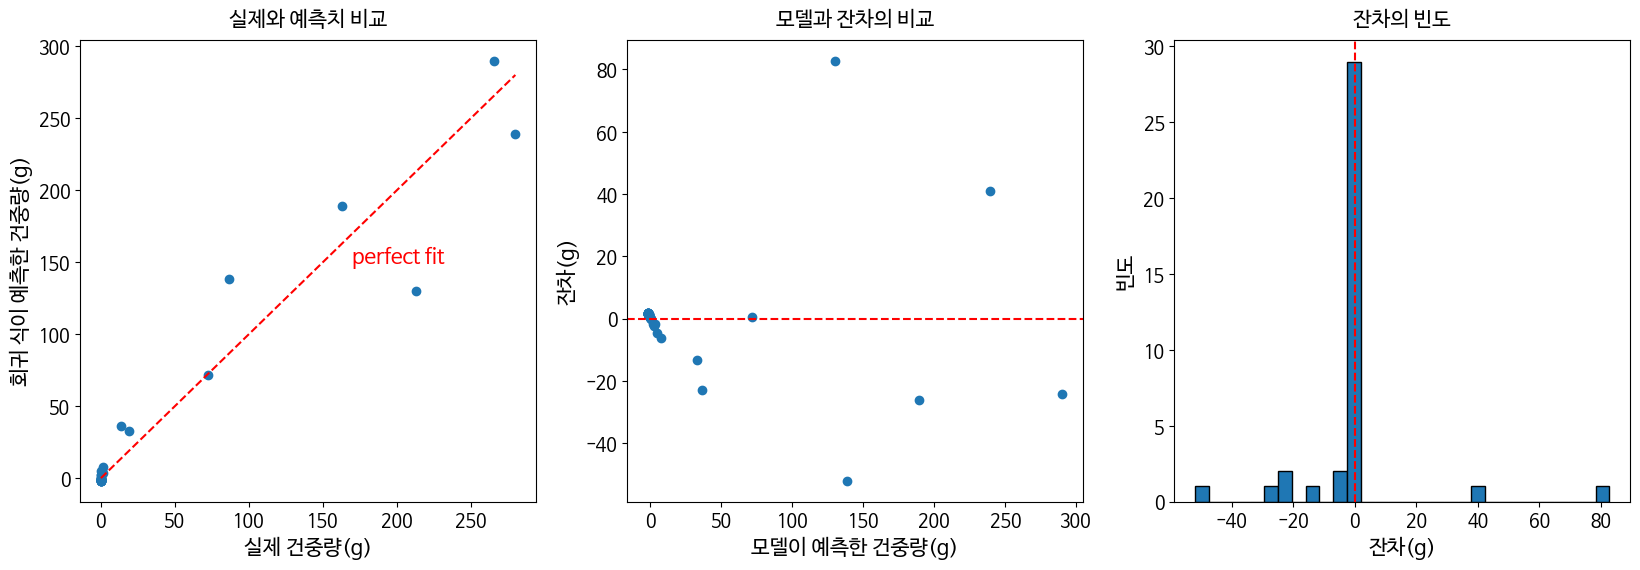

In [178]:
# 독립변수: 줄기 건중량, 종속변수: 가지 건중량

# 멱함수 회귀

# Define the model function
def model(X, a, b, c) :
    x = X
    return a * (x ** b) + c

x = young_tree['줄기 건중량(g)'].to_numpy()
y = young_tree['가지 건중량(g)'].to_numpy()

# Flatten variables for curve_fit
x = x.flatten()
y = y.flatten()

# Fit the model
initial_guess = [0.1, 0.1, 0.1]  # Initial guesses for a, b, c, d, e
params, covariance = curve_fit(model, x, y, p0 = initial_guess)

# Extract fitted parameters
a, b, c = params
print(f'Fitted Parameters: a = {a}, b = {b}, c = {c}')
print(f'y = {a} * (x ** {b}) + {c}')

# Predict using the fitted model
y_pred = model(x, a, b, c)

# Compute residuals
residuals = y - y_pred

# Metrics for goodness-of-fit
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

# Visualization
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 6))

# 1. Actual vs Predicted
ax[0].scatter(y, y_pred)
ax[0].plot([min(y), max(y)], [min(y), max(y)], linestyle = '--', color = 'red')
ax[0].text(x = 170, y = 150, s = 'perfect fit', color = 'red', fontsize = 15)
ax[0].set_xlabel("실제 건중량(g)", fontsize = 15)
ax[0].set_ylabel("회귀 식이 예측한 건중량(g)", fontsize = 15)
ax[0].set_title("실제와 예측치 비교", fontsize = 15, pad = 10)

# 2. Residuals
ax[1].scatter(y_pred, residuals)
ax[1].axhline(0, color='red', linestyle='--')
ax[1].set_xlabel('모델이 예측한 건중량(g)', fontsize = 15)
ax[1].set_ylabel('잔차(g)', fontsize = 15)
ax[1].set_title('모델과 잔차의 비교', fontsize = 15, pad = 10)

# 3. Distribution of Residuals
ax[2].hist(residuals, bins = 30, edgecolor = 'black')
ax[2].axvline(0, color='red', linestyle='--')
ax[2].set_xlabel('잔차(g)', fontsize = 15)
ax[2].set_ylabel('빈도', fontsize = 15)
ax[2].set_title('잔차의 빈도', fontsize = 15, pad = 10)

# x, y 축 눈금 크기 조정
for ax_i in ax:
    ax_i.tick_params(axis = 'both', labelsize = 13)
plt.show()

Fitted Parameters: a = 1.1304834915449449, b = 0.5150511269174752, c = -0.34420997998037967
y = 1.1304834915449449 * (x ** 0.5150511269174752) + -0.34420997998037967
R-squared: 0.8734503240586414
Mean Absolute Error: 1.2213637970351634
Root Mean Squared Error: 2.7782623601913925


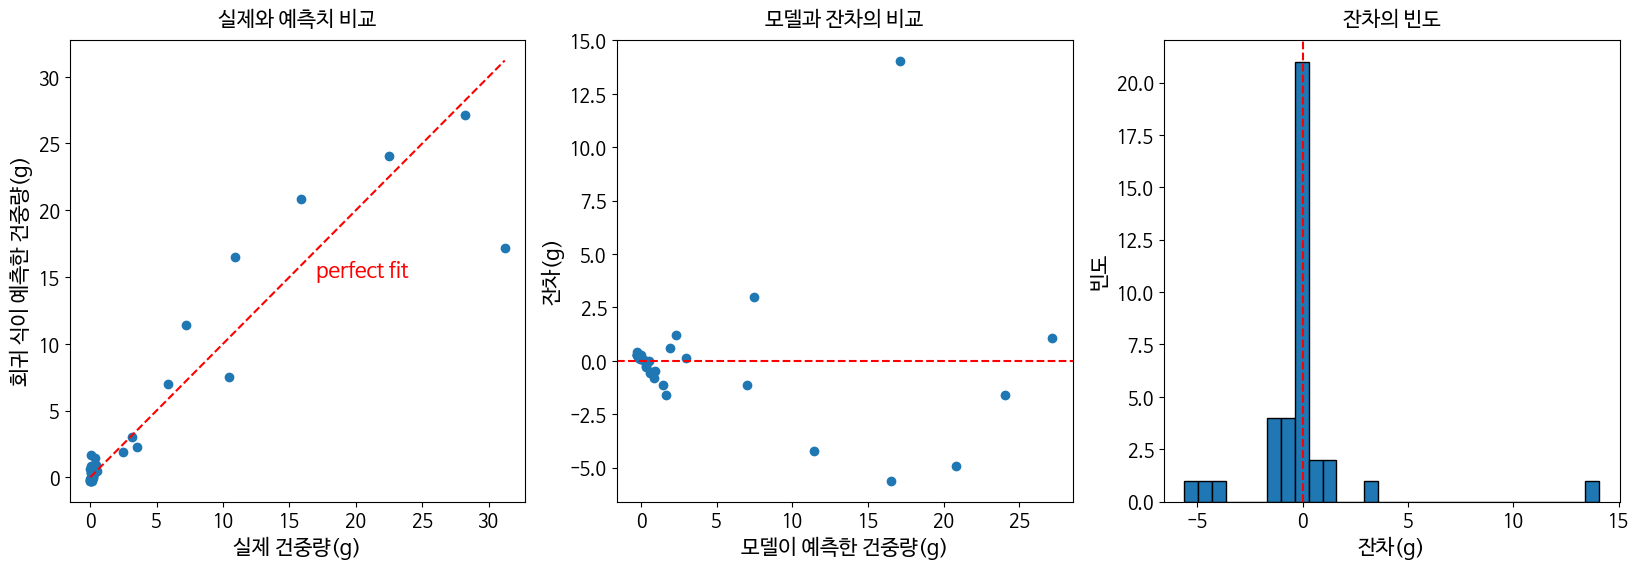

In [181]:
# 독립변수: 줄기 건중량, 종속변수: 잎 건중량

# 멱함수 회귀

# Define the model function
def model(X, a, b, c) :
    x = X
    return a * (x ** b) + c

x = young_tree['줄기 건중량(g)'].to_numpy()
y = young_tree['잎 건중량(g)'].to_numpy()

# Flatten variables for curve_fit
x = x.flatten()
y = y.flatten()

# Fit the model
initial_guess = [0.1, 0.1, 0.1]  # Initial guesses for a, b, c
params, covariance = curve_fit(model, x, y, p0 = initial_guess)

# Extract fitted parameters
a, b, c = params
print(f'Fitted Parameters: a = {a}, b = {b}, c = {c}')
print(f'y = {a} * (x ** {b}) + {c}')

# Predict using the fitted model
y_pred = model(x, a, b, c)

# Compute residuals
residuals = y - y_pred

# Metrics for goodness-of-fit
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

# Visualization
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 6))

# 1. Actual vs Predicted
ax[0].scatter(y, y_pred)
ax[0].plot([min(y), max(y)], [min(y), max(y)], linestyle = '--', color = 'red')
ax[0].text(x = 17, y = 15, s = 'perfect fit', color = 'red', fontsize = 15)
ax[0].set_xlabel("실제 건중량(g)", fontsize = 15)
ax[0].set_ylabel("회귀 식이 예측한 건중량(g)", fontsize = 15)
ax[0].set_title("실제와 예측치 비교", fontsize = 15, pad = 10)

# 2. Residuals
ax[1].scatter(y_pred, residuals)
ax[1].axhline(0, color='red', linestyle='--')
ax[1].set_xlabel('모델이 예측한 건중량(g)', fontsize = 15)
ax[1].set_ylabel('잔차(g)', fontsize = 15)
ax[1].set_title('모델과 잔차의 비교', fontsize = 15, pad = 10)

# 3. Distribution of Residuals
ax[2].hist(residuals, bins = 30, edgecolor = 'black')
ax[2].axvline(0, color='red', linestyle='--')
ax[2].set_xlabel('잔차(g)', fontsize = 15)
ax[2].set_ylabel('빈도', fontsize = 15)
ax[2].set_title('잔차의 빈도', fontsize = 15, pad = 10)

# x, y 축 눈금 크기 조정
for ax_i in ax:
    ax_i.tick_params(axis = 'both', labelsize = 13)
plt.show()

Fitted Parameters: a = 0.641553388588165, b = 1.0824354386085153, c = 2.7662147653206763
y = 0.641553388588165 * (x ** 1.0824354386085153) + 2.7662147653206763
R-squared: 0.9413768132697745
Mean Absolute Error: 14.339654998694904
Root Mean Squared Error: 29.622571390755066


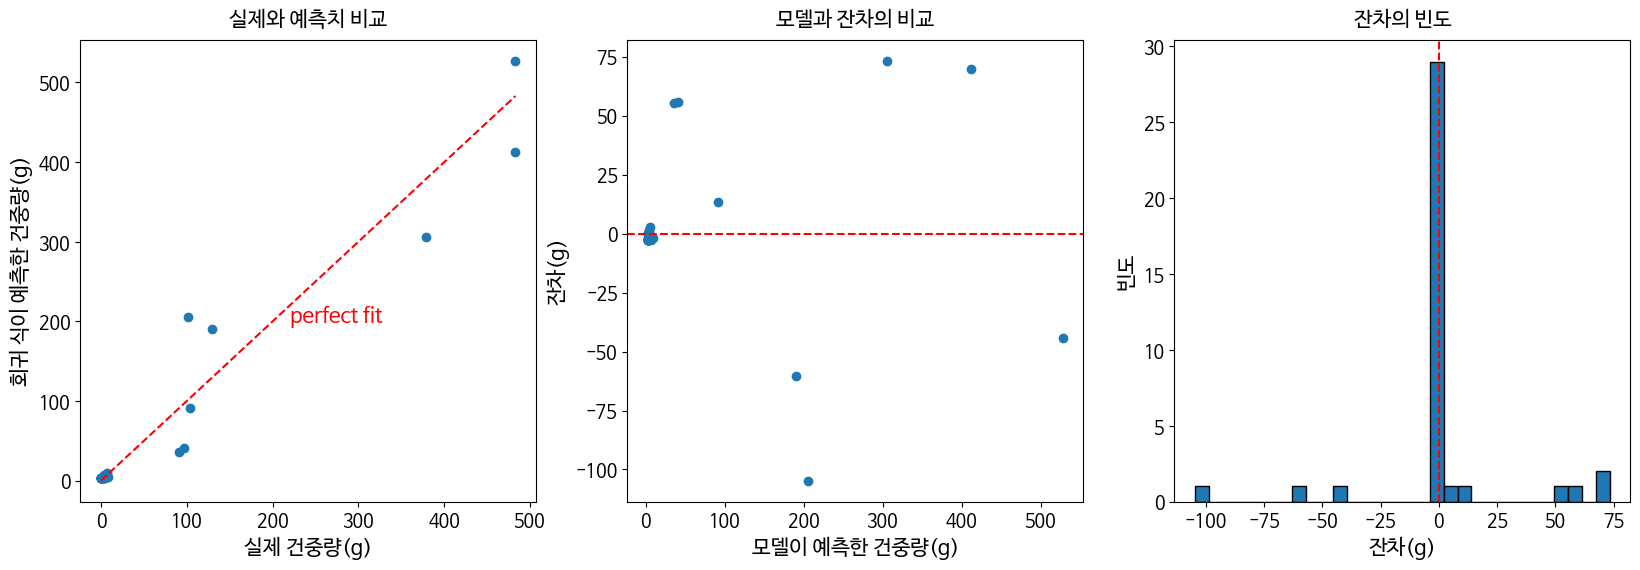

In [183]:
# 독립변수: 줄기 건중량, 종속변수: 뿌리 건중량

# 멱함수 회귀

# Define the model function
def model(X, a, b, c) :
    x = X
    return a * (x ** b) + c

x = young_tree['줄기 건중량(g)'].to_numpy()
y = young_tree['뿌리 건중량(g)'].to_numpy()

# Flatten variables for curve_fit
x = x.flatten()
y = y.flatten()

# Fit the model
initial_guess = [0.1, 0.1, 0.1]  # Initial guesses for a, b, c
params, covariance = curve_fit(model, x, y, p0 = initial_guess)

# Extract fitted parameters
a, b, c = params
print(f'Fitted Parameters: a = {a}, b = {b}, c = {c}')
print(f'y = {a} * (x ** {b}) + {c}')

# Predict using the fitted model
y_pred = model(x, a, b, c)

# Compute residuals
residuals = y - y_pred

# Metrics for goodness-of-fit
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

# Visualization
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 6))

# 1. Actual vs Predicted
ax[0].scatter(y, y_pred)
ax[0].plot([min(y), max(y)], [min(y), max(y)], linestyle = '--', color = 'red')
ax[0].text(x = 220, y = 200, s = 'perfect fit', color = 'red', fontsize = 15)
ax[0].set_xlabel("실제 건중량(g)", fontsize = 15)
ax[0].set_ylabel("회귀 식이 예측한 건중량(g)", fontsize = 15)
ax[0].set_title("실제와 예측치 비교", fontsize = 15, pad = 10)

# 2. Residuals
ax[1].scatter(y_pred, residuals)
ax[1].axhline(0, color='red', linestyle='--')
ax[1].set_xlabel('모델이 예측한 건중량(g)', fontsize = 15)
ax[1].set_ylabel('잔차(g)', fontsize = 15)
ax[1].set_title('모델과 잔차의 비교', fontsize = 15, pad = 10)

# 3. Distribution of Residuals
ax[2].hist(residuals, bins = 30, edgecolor = 'black')
ax[2].axvline(0, color='red', linestyle='--')
ax[2].set_xlabel('잔차(g)', fontsize = 15)
ax[2].set_ylabel('빈도', fontsize = 15)
ax[2].set_title('잔차의 빈도', fontsize = 15, pad = 10)

# x, y 축 눈금 크기 조정
for ax_i in ax :
    ax_i.tick_params(axis = 'both', labelsize = 13)
plt.show()